# Business Problem

**A major general insurance company has a business problem with significant number of claims being reported are fraudulent in nature and it is leading to leakages.  So, the Insurer decided to predict the fraudulent ones before even processing**

# About the Data

We have 5 datastes like claim_data,Demographics_data,Policy_data,Vehicle_data and Train_data_vt_target. Every dataset contains 28,836  rows but Vehicle_data contains 1,15,344 rows. Vehicle_data is having some pattern in it, that can be reduced into 28,836 rows. 

On merging datasets into one the dataset contains 42 features and 28,836 rows in train dataset and 8,912 data in test dataset.The description of each feature is as below:

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt #For Visualization Purpose
import seaborn as sns #For Visualization Purpose

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the datasets as pandas dataframes 
claim_data=pd.read_csv("Train_Claim.csv")
Demographics_data=pd.read_csv("Train_Demographics.csv")
Policy_data=pd.read_csv("Train_Policy.csv")
Vehicle_data=pd.read_csv("Train_Vehicle.csv")
Train_data_vt_target=pd.read_csv("Traindata_with_Target.csv")

In [3]:
Vehicle_data.shape

(115344, 3)

In [4]:
#Reading data sets
Test_Claim=pd.read_csv("Test_Claim.csv")
Test_Demographics=pd.read_csv("Test_Demographics.csv")
Test_Policy=pd.read_csv("Test_Policy.csv")
Test_Vehicle=pd.read_csv("Test_Vehicle.csv")
Test=pd.read_csv("Test.csv")

In [5]:
#Sorting
claim_data=claim_data.sort_values(by="CustomerID")
Test_Claim=Test_Claim.sort_values(by="CustomerID")

In [6]:
claim_data.head()

CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
0  Cust10000     2015-02-03   Multi-vehicle Collision   Side Collision   
1  Cust10001     2015-02-02   Multi-vehicle Collision   Side Collision   
2  Cust10002     2015-01-15  Single Vehicle Collision   Side Collision   
3  Cust10003     2015-01-19  Single Vehicle Collision   Side Collision   
4  Cust10004     2015-01-09  Single Vehicle Collision   Rear Collision   

  SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
0         Total Loss               Police        State7        City1   
1         Total Loss               Police        State7        City5   
2       Minor Damage                Other        State8        City6   
3       Minor Damage                Other        State9        City6   
4       Minor Damage                 Fire        State8        City6   

  IncidentAddress  IncidentTime  NumberOfVehicles PropertyDamage  \
0   Location 1311            17                 3              ?   
1   Location 1311            10                 3            YES   
2   Location 2081            22                 1            YES   
3   Location 2081            22                 1            YES   
4   Location 1695            10                 1             NO   

   BodilyInjuries Witnesses PoliceReport AmountOfTotalClaim  \
0               1         0            ?              65501   
1               2         1          YES              61382   
2               2         3           NO              66755   
3               2         3           NO              66243   
4               2         1          YES              53544   

   AmountOfInjuryClaim  AmountOfPropertyClaim  AmountOfVehicleDamage  
0                13417                   6071                  46013  
1                15560                   5919                  39903  
2                11630                  11630                  43495  
3                12003                  12003                  42237  
4                 8829                   7234                  37481

In [7]:
claim_data.dtypes

CustomerID               object
DateOfIncident           object
TypeOfIncident           object
TypeOfCollission         object
SeverityOfIncident       object
AuthoritiesContacted     object
IncidentState            object
IncidentCity             object
IncidentAddress          object
IncidentTime              int64
NumberOfVehicles          int64
PropertyDamage           object
BodilyInjuries            int64
Witnesses                object
PoliceReport             object
AmountOfTotalClaim       object
AmountOfInjuryClaim       int64
AmountOfPropertyClaim     int64
AmountOfVehicleDamage     int64
dtype: object

Since witnesses and AmountOfTotalClaim is in string format, that needs to be converted into integer type. Because, Witnesses : no of witnesses and Witnesses : Total claim amount

In [8]:
#AS 'MISSEDDATA',and 'MISSSINGVALUE' repersents the missing values that are replaced by -1,Since it has to converted to int type
claim_data['Witnesses']=claim_data['Witnesses'].replace("MISSINGVALUE",-1)
claim_data['AmountOfTotalClaim']=claim_data['AmountOfTotalClaim'].replace("MISSEDDATA",-1)

Test_Claim['Witnesses']=Test_Claim['Witnesses'].replace("MISSINGVALUE",-1)
Test_Claim['AmountOfTotalClaim']=Test_Claim['AmountOfTotalClaim'].replace("MISSEDDATA",-1)

In [9]:
#Converting 'Witnesses' and  'AmountOfTotalClaim' to int type
claim_data[['Witnesses', 'AmountOfTotalClaim']] = claim_data[['Witnesses', 'AmountOfTotalClaim']].astype(int)

Test_Claim[['Witnesses', 'AmountOfTotalClaim']] = Test_Claim[['Witnesses', 'AmountOfTotalClaim']].astype(int)

In [10]:
print(claim_data['TypeOfIncident'].unique())
print(claim_data['TypeOfCollission'].unique())
print(claim_data['SeverityOfIncident'].unique())
print(claim_data['AuthoritiesContacted'].unique())
print(claim_data['IncidentState'].unique())
print(claim_data['IncidentCity'].unique())
print(claim_data['PropertyDamage'].unique())
print(claim_data['PoliceReport'].unique())

['Multi-vehicle Collision' 'Single Vehicle Collision' 'Parked Car'
 'Vehicle Theft']
['Side Collision' 'Rear Collision' 'Front Collision' '?']
['Total Loss' 'Minor Damage' 'Major Damage' 'Trivial Damage']
['Police' 'Other' 'Fire' 'Ambulance' 'None']
['State7' 'State8' 'State9' 'State5' 'State6' 'State4' 'State3']
['City1' 'City5' 'City6' 'City4' 'City3' 'City2' 'City7']
['?' 'YES' 'NO']
['?' 'YES' 'NO']


In [11]:
#missing values percentage
df_missing_values = pd.DataFrame({ 'missing_%age':((claim_data == '?').sum()/claim_data.shape[0])*100})
df_missing_values = (df_missing_values[df_missing_values['missing_%age']>0].sort_values(by=['missing_%age'],ascending=False))
df_missing_values

missing_%age
PropertyDamage       36.270634
PoliceReport         34.002636
TypeOfCollission     17.901235

In [12]:
#Encoding 'PropertyDamage' and 'PoliceReport' and also imputing missing values with there respective column
#mode of 'PoliceReport' and 'PropertyDamage' both are 'NO'  only
claim_data['PropertyDamage'].replace(to_replace='YES', value=1, inplace=True)
claim_data['PropertyDamage'].replace(to_replace='NO', value=0, inplace=True)
claim_data['PropertyDamage'].replace(to_replace='?', value=0, inplace=True)
claim_data['PoliceReport'].replace(to_replace='YES', value=1, inplace=True)
claim_data['PoliceReport'].replace(to_replace='NO', value=0, inplace=True)
claim_data['PoliceReport'].replace(to_replace='?', value=0, inplace=True)


#for test data
Test_Claim['PropertyDamage'].replace(to_replace='YES', value=1, inplace=True)
Test_Claim['PropertyDamage'].replace(to_replace='NO', value=0, inplace=True)
Test_Claim['PropertyDamage'].replace(to_replace='?', value=0, inplace=True)
Test_Claim['PoliceReport'].replace(to_replace='YES', value=1, inplace=True)
Test_Claim['PoliceReport'].replace(to_replace='NO', value=0, inplace=True)
Test_Claim['PoliceReport'].replace(to_replace='?', value=0, inplace=True)

In [13]:
claim_data.head()

CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
0  Cust10000     2015-02-03   Multi-vehicle Collision   Side Collision   
1  Cust10001     2015-02-02   Multi-vehicle Collision   Side Collision   
2  Cust10002     2015-01-15  Single Vehicle Collision   Side Collision   
3  Cust10003     2015-01-19  Single Vehicle Collision   Side Collision   
4  Cust10004     2015-01-09  Single Vehicle Collision   Rear Collision   

  SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
0         Total Loss               Police        State7        City1   
1         Total Loss               Police        State7        City5   
2       Minor Damage                Other        State8        City6   
3       Minor Damage                Other        State9        City6   
4       Minor Damage                 Fire        State8        City6   

  IncidentAddress  IncidentTime  NumberOfVehicles  PropertyDamage  \
0   Location 1311            17                 3               0   
1   Location 1311            10                 3               1   
2   Location 2081            22                 1               1   
3   Location 2081            22                 1               1   
4   Location 1695            10                 1               0   

   BodilyInjuries  Witnesses  PoliceReport  AmountOfTotalClaim  \
0               1          0             0               65501   
1               2          1             1               61382   
2               2          3             0               66755   
3               2          3             0               66243   
4               2          1             1               53544   

   AmountOfInjuryClaim  AmountOfPropertyClaim  AmountOfVehicleDamage  
0                13417                   6071                  46013  
1                15560                   5919                  39903  
2                11630                  11630                  43495  
3                12003                  12003                  42237  
4                 8829                   7234                  37481

In [14]:
claim_data.dtypes

CustomerID               object
DateOfIncident           object
TypeOfIncident           object
TypeOfCollission         object
SeverityOfIncident       object
AuthoritiesContacted     object
IncidentState            object
IncidentCity             object
IncidentAddress          object
IncidentTime              int64
NumberOfVehicles          int64
PropertyDamage            int64
BodilyInjuries            int64
Witnesses                 int32
PoliceReport              int64
AmountOfTotalClaim        int32
AmountOfInjuryClaim       int64
AmountOfPropertyClaim     int64
AmountOfVehicleDamage     int64
dtype: object

In [15]:
#checking for missing values ->"?"
print((claim_data == '?').sum())
# As -1 indicating missing value in AmountOfTotalClaim and Witnesses , Find the percentage of missing values 
claim_missing_values = pd.DataFrame({'column':claim_data.columns, 'missing_%age':((claim_data == -1).sum()/claim_data.shape[0])*100}, index=None)
claim_missing_values = (claim_missing_values[claim_missing_values['missing_%age']>0].sort_values(by=['missing_%age'],ascending=False))
print(claim_missing_values)
#As -5 indicating missing value in IncidentTime, Find the percentage of missing values 
claim_missing_values = pd.DataFrame({'column':claim_data.columns, 'missing_%age':((claim_data == -5).sum()/claim_data.shape[0])*100}, index=None)
claim_missing_values = (claim_missing_values[claim_missing_values['missing_%age']>0].sort_values(by=['missing_%age'],ascending=False))
print(claim_missing_values)

CustomerID                  0
DateOfIncident              0
TypeOfIncident              0
TypeOfCollission         5162
SeverityOfIncident          0
AuthoritiesContacted        0
IncidentState               0
IncidentCity                0
IncidentAddress             0
IncidentTime                0
NumberOfVehicles            0
PropertyDamage              0
BodilyInjuries              0
Witnesses                   0
PoliceReport                0
AmountOfTotalClaim          0
AmountOfInjuryClaim         0
AmountOfPropertyClaim       0
AmountOfVehicleDamage       0
dtype: int64
                                column  missing_%age
AmountOfTotalClaim  AmountOfTotalClaim      0.173394
Witnesses                    Witnesses      0.159523
                    column  missing_%age
IncidentTime  IncidentTime      0.107505


In [16]:
#finding mode of Witnesses column
Witnesses_modetrain=claim_data['Witnesses'].mode()
print(Witnesses_modetrain)

Witnesses_modetest=Test_Claim['Witnesses'].mode()
print(Witnesses_modetest)


0    2
Name: Witnesses, dtype: int32
0    1
Name: Witnesses, dtype: int32


In [17]:
#Since it is categorical data that we can replace with its mode  value
#Mode imputation
claim_data['Witnesses'] = claim_data['Witnesses'].replace(-1,2)

Test_Claim['Witnesses'] = Test_Claim['Witnesses'].replace(-1,1)

In [18]:
(claim_data == -1).sum()

CustomerID                0
DateOfIncident            0
TypeOfIncident            0
TypeOfCollission          0
SeverityOfIncident        0
AuthoritiesContacted      0
IncidentState             0
IncidentCity              0
IncidentAddress           0
IncidentTime              0
NumberOfVehicles          0
PropertyDamage            0
BodilyInjuries            0
Witnesses                 0
PoliceReport              0
AmountOfTotalClaim       50
AmountOfInjuryClaim       0
AmountOfPropertyClaim     0
AmountOfVehicleDamage     0
dtype: int64

<AxesSubplot:xlabel='AmountOfTotalClaim', ylabel='Density'>

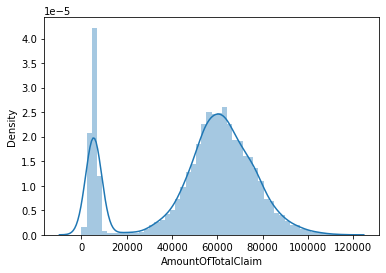

In [19]:
sns.distplot(claim_data['AmountOfTotalClaim'], kde = True)

In [20]:
#Median imputation for missing values
AmountOfTotalClaim_meadian_train=claim_data['AmountOfTotalClaim'].median()
claim_data['AmountOfTotalClaim'] = claim_data['AmountOfTotalClaim'].replace(-1,AmountOfTotalClaim_meadian_train)

AmountOfTotalClaim_meadian_test=Test_Claim['AmountOfTotalClaim'].median()
Test_Claim['AmountOfTotalClaim'] = Test_Claim['AmountOfTotalClaim'].replace(-1,AmountOfTotalClaim_meadian_test)

In [21]:
claim_data['AmountOfTotalClaim']

0        65501.0
1        61382.0
2        66755.0
3        66243.0
4        53544.0
          ...   
28831     6590.0
28832    74547.0
28833    55305.0
28834    55830.0
28835    68969.0
Name: AmountOfTotalClaim, Length: 28836, dtype: float64

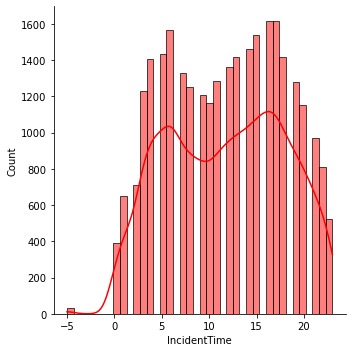

In [22]:
sns.displot(claim_data['IncidentTime'], kde = True, color ='red') #can do rows drop

In [23]:
claim_data.dtypes

CustomerID                object
DateOfIncident            object
TypeOfIncident            object
TypeOfCollission          object
SeverityOfIncident        object
AuthoritiesContacted      object
IncidentState             object
IncidentCity              object
IncidentAddress           object
IncidentTime               int64
NumberOfVehicles           int64
PropertyDamage             int64
BodilyInjuries             int64
Witnesses                  int32
PoliceReport               int64
AmountOfTotalClaim       float64
AmountOfInjuryClaim        int64
AmountOfPropertyClaim      int64
AmountOfVehicleDamage      int64
dtype: object

As we observed there are 7  columnns need to be converted into numerical values.. Since we didn't done our vusualization I will be keeping them as strings only. After visualization we can convert it into numerical values..

In [24]:
##########################################################################################################

# Demographics_data

In [25]:
Demographics_data.head()

CustomerID  InsuredAge  InsuredZipCode InsuredGender InsuredEducationLevel  \
0  Cust10000          35          454776          MALE                    JD   
1  Cust10001          36          454776          MALE                    JD   
2  Cust10002          33          603260          MALE                    JD   
3  Cust10003          36          474848          MALE                    JD   
4  Cust10004          29          457942        FEMALE           High School   

  InsuredOccupation InsuredHobbies  CapitalGains  CapitalLoss Country  
0      armed-forces         movies         56700       -48500   India  
1      tech-support      cross-fit         70600       -48500   India  
2      armed-forces           polo         66400       -63700   India  
3      armed-forces           polo         47900       -73400   India  
4   exec-managerial        dancing             0       -41500   India

In [26]:
#sorting dataset by CustomerID
Demographics_data=Demographics_data.sort_values(by="CustomerID")

Test_Demographics=Test_Demographics.sort_values(by="CustomerID")

In [27]:
#size of dataset
Demographics_data.shape

(28836, 10)

In [28]:
Demographics_data.dtypes

CustomerID               object
InsuredAge                int64
InsuredZipCode            int64
InsuredGender            object
InsuredEducationLevel    object
InsuredOccupation        object
InsuredHobbies           object
CapitalGains              int64
CapitalLoss               int64
Country                  object
dtype: object

In [29]:
#dropping country column
Demographics_data=Demographics_data.drop(['Country'],axis=1)

Test_Demographics=Test_Demographics.drop(['Country'],axis=1)

In [30]:
#printing unique values 
print(Demographics_data['InsuredGender'].unique())
print(Demographics_data['InsuredEducationLevel'].unique())
#printing len ogf unique values
print(len(Demographics_data['InsuredOccupation'].unique()))
print(len(Demographics_data['InsuredHobbies'].unique()))

['MALE' 'FEMALE' nan]
['JD' 'High School' 'Masters' 'MD' 'Associate' 'College' 'PhD']
14
20


In [31]:
#Checking for missing values
Demographics_data.InsuredGender.isnull().sum()

30

In [32]:
Demographics_data_missing_values = pd.DataFrame({ 'missing_%age':((Demographics_data.isnull()).sum()/Demographics_data.shape[0])*100})
Demographics_data_missing_values = (Demographics_data_missing_values[Demographics_data_missing_values['missing_%age']>0].sort_values(by=['missing_%age'],ascending=False))
Demographics_data_missing_values

missing_%age
InsuredGender      0.104037

Since the InsuredGender column is categorical data We can replace the missing values with mode

In [33]:
#Checking for mode
print("mode of Demographics_data",Demographics_data['InsuredGender'].mode())

print("mode of Test_Demographics",Test_Demographics['InsuredGender'].mode())

mode of Demographics_data 0    FEMALE
Name: InsuredGender, dtype: object
mode of Test_Demographics 0    FEMALE
Name: InsuredGender, dtype: object


In [34]:
#Replacing null values with node 
Demographics_data["InsuredGender"].fillna("FEMALE", inplace = True)

Test_Demographics["InsuredGender"].fillna("FEMALE", inplace = True)

In [35]:
#Checking for missing values
Demographics_data.InsuredGender.isnull().sum()  #here there is no null values

0

In [36]:
Demographics_data.dtypes

CustomerID               object
InsuredAge                int64
InsuredZipCode            int64
InsuredGender            object
InsuredEducationLevel    object
InsuredOccupation        object
InsuredHobbies           object
CapitalGains              int64
CapitalLoss               int64
dtype: object

In [37]:
len(Demographics_data['InsuredZipCode'].unique())

995

As we observed there are 4 columnns need to be converted into numerical values.. Since we didn't done our vusualization I will be keeping them as strings only. After visualization we can convert it into numerical values..

In [38]:
#############################################################################3

# Policy_data

In [39]:
Policy_data.head()

InsurancePolicyNumber  CustomerLoyaltyPeriod DateOfPolicyCoverage  \
0                 110122                    328           2014-10-17   
1                 110125                    256           1990-05-25   
2                 110126                    228           2014-06-06   
3                 110127                    256           2006-10-12   
4                 110128                    137           2000-06-04   

  InsurancePolicyState Policy_CombinedSingleLimit  Policy_Deductible  \
0               State3                    250/500               1000   
1               State1                    250/500               2000   
2               State1                   500/1000               1000   
3               State3                    250/500               1000   
4               State2                    250/500               1000   

   PolicyAnnualPremium  UmbrellaLimit InsuredRelationship CustomerID  
0              1406.91              0             husband   Cust1001  
1              1415.74        6000000           unmarried   Cust1004  
2              1583.91        6000000           unmarried   Cust1005  
3              1351.10              0           unmarried   Cust1006  
4              1333.35              0             husband   Cust1007

In [40]:
#sorting dataset by CustomerID
Policy_data=Policy_data.sort_values(by="CustomerID")

Test_Policy=Test_Policy.sort_values(by="CustomerID")

In [41]:
#Checking for size of unique values 
print("size each unique values in InsurancePolicyState :",len(Policy_data['InsurancePolicyState'].unique()))
print("size each unique values in InsuredRelationship :",len(Policy_data['InsuredRelationship'].unique()))

size each unique values in InsurancePolicyState : 3
size each unique values in InsuredRelationship : 6


In [42]:
#splitting Policy_CombinedSingleLimit by '/'
Policy_data['csl_per_person'] = Policy_data.Policy_CombinedSingleLimit.str.split('/', expand=True)[0]
Policy_data['csl_per_accident'] = Policy_data.Policy_CombinedSingleLimit.str.split('/', expand=True)[1]

Test_Policy['csl_per_person'] = Test_Policy.Policy_CombinedSingleLimit.str.split('/', expand=True)[0]
Test_Policy['csl_per_accident'] = Test_Policy.Policy_CombinedSingleLimit.str.split('/', expand=True)[1]

In [43]:
#dropping Policy_CombinedSingleLimit column
Policy_data=Policy_data.drop(['Policy_CombinedSingleLimit'],axis=1)

Test_Policy=Test_Policy.drop(['Policy_CombinedSingleLimit'],axis=1)

In [44]:
#Converting 'csl_per_person' and  'csl_per_accident' to int type
Policy_data[['csl_per_person', 'csl_per_accident']] = Policy_data[['csl_per_person', 'csl_per_accident']].astype(int)

Test_Policy[['csl_per_person', 'csl_per_accident']] = Test_Policy[['csl_per_person', 'csl_per_accident']].astype(int)

In [45]:
Policy_data.head()

InsurancePolicyNumber  CustomerLoyaltyPeriod DateOfPolicyCoverage  \
6777                 119121                     49           1998-10-25   
6778                 119122                    114           2000-11-15   
6779                 119123                    167           2001-02-12   
6780                 119124                    190           2005-04-11   
6781                 119125                    115           1996-10-25   

     InsurancePolicyState  Policy_Deductible  PolicyAnnualPremium  \
6777               State1               1000              1632.73   
6778               State1               1000              1255.19   
6779               State3                617              1373.38   
6780               State2                722              1337.60   
6781               State2                500              1353.73   

      UmbrellaLimit InsuredRelationship CustomerID  csl_per_person  \
6777              0       not-in-family  Cust10000             100   
6778              0       not-in-family  Cust10001             100   
6779              0                wife  Cust10002             500   
6780              0           own-child  Cust10003             500   
6781        4279863           unmarried  Cust10004             100   

      csl_per_accident  
6777               300  
6778               300  
6779              1000  
6780              1000  
6781               300

In [46]:
Policy_data.dtypes

InsurancePolicyNumber      int64
CustomerLoyaltyPeriod      int64
DateOfPolicyCoverage      object
InsurancePolicyState      object
Policy_Deductible          int64
PolicyAnnualPremium      float64
UmbrellaLimit              int64
InsuredRelationship       object
CustomerID                object
csl_per_person             int32
csl_per_accident           int32
dtype: object

As we observed there are 4 columnns need to be converted into numerical values.. Since we didn't done our vusualization I will be keeping them as strings only. After visualization we can convert it into numerical values..

In [47]:
###########################################################################

# Vehicle_data

In [48]:
Vehicle_data.head()

CustomerID VehicleAttribute VehicleAttributeDetails
0  Cust20179        VehicleID             Vehicle8898
1  Cust21384     VehicleModel                  Malibu
2  Cust33335      VehicleMake                  Toyota
3  Cust27118     VehicleModel                    Neon
4  Cust13038        VehicleID            Vehicle30212

In [49]:
Vehicle_data.dtypes

CustomerID                 object
VehicleAttribute           object
VehicleAttributeDetails    object
dtype: object

In [50]:
#checking for the length of unique values in each column
print("Length of unique values in CustomerID:", len(Vehicle_data['CustomerID'].unique()))
print("Length of unique values in VehicleAttribute:",len(Vehicle_data['VehicleAttribute'].unique()))
print("Length of unique values in VehicleAttributeDetails:",len(Vehicle_data['VehicleAttributeDetails'].unique()))

Length of unique values in CustomerID: 28836
Length of unique values in VehicleAttribute: 4
Length of unique values in VehicleAttributeDetails: 28911


In [51]:
Vehicle_data=Vehicle_data.pivot_table('VehicleAttributeDetails',['CustomerID'],'VehicleAttribute',aggfunc='first').reset_index().rename_axis(columns=None)

Test_Vehicle=Test_Vehicle.pivot_table('VehicleAttributeDetails',['CustomerID'],'VehicleAttribute',aggfunc='first').reset_index().rename_axis(columns=None)

In [52]:
Vehicle_data

CustomerID     VehicleID VehicleMake VehicleModel VehicleYOM
0      Cust10000  Vehicle26917        Audi           A5       2008
1      Cust10001  Vehicle15893        Audi           A5       2006
2      Cust10002   Vehicle5152  Volkswagen        Jetta       1999
3      Cust10003  Vehicle37363  Volkswagen        Jetta       2003
4      Cust10004  Vehicle28633      Toyota          CRV       2010
...          ...           ...         ...          ...        ...
28831   Cust9993  Vehicle13568      Suburu      Impreza       2007
28832   Cust9994  Vehicle19810        Jeep     Wrangler       2003
28833   Cust9996   Vehicle3339      Suburu       Legacy       2004
28834   Cust9997  Vehicle10240      Suburu    Forrestor       2004
28835   Cust9999  Vehicle39163      Suburu         E400       2007

[28836 rows x 5 columns]

In [53]:
#shape of Vehicle_data data set
Vehicle_data.shape

(28836, 5)

In [54]:
#checking for the length of unique values in each column
print("Length of unique values in VehicleID:", len(Vehicle_data['VehicleID'].unique()))
print("Length of unique values in VehicleMake:",len(Vehicle_data['VehicleMake'].unique()))
print("Length of unique values in VehicleModel:",len(Vehicle_data['VehicleModel'].unique()))
print("Length of unique values in VehicleYOM:",len(Vehicle_data['VehicleYOM'].unique()))

Length of unique values in VehicleID: 28836
Length of unique values in VehicleMake: 15
Length of unique values in VehicleModel: 39
Length of unique values in VehicleYOM: 21


In [55]:
Vehicle_data.dtypes

CustomerID      object
VehicleID       object
VehicleMake     object
VehicleModel    object
VehicleYOM      object
dtype: object

As we observed there are 4 columnns need to be converted into numerical values.. Since we didn't done our vusualization I will be keeping them as strings only. After visualization we can convert it into numerical values..

In [56]:
###############################################################################################33

# Train data with target variable

In [57]:
Train_data_vt_target.head()

CustomerID ReportedFraud
0  Cust20065             N
1  Cust37589             N
2  Cust24312             N
3   Cust5493             Y
4   Cust7704             Y

In [58]:
#Data Merging
Train_Merged=pd.merge(claim_data,Demographics_data, on="CustomerID")
Train_Merged=pd.merge(Train_Merged,Policy_data,on="CustomerID")
Train_Merged=pd.merge(Train_Merged,Vehicle_data,on="CustomerID")
Train_Merged=pd.merge(Train_Merged,Train_data_vt_target,on="CustomerID")

Test_Merged=pd.merge(Test_Claim,Test_Demographics, on="CustomerID")
Test_Merged=pd.merge(Test_Merged,Test_Policy,on="CustomerID")
Test_Merged=pd.merge(Test_Merged,Test_Vehicle,on="CustomerID")
Test_Merged=pd.merge(Test_Merged,Test,on="CustomerID")

In [59]:
#saving into a file 
Train_Merged.to_csv('Merged_Train_data.csv',index=False)
Test_Merged.to_csv('Merged_Test_data.csv',index=False)

In [2]:
# Reading  data
Train_Merged=pd.read_csv("Merged_Train_data.csv")
Test_Merged=pd.read_csv("Merged_Test_data.csv")

In [3]:
#Shape of train and test data
print("Shape of the Train data : ",Train_Merged.shape)
print("Shape of the Test data : ",Test_Merged.shape)

Shape of the Train data :  (28836, 42)
Shape of the Test data :  (8912, 41)


In [4]:
Train_Merged.head()

CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
0  Cust10000     2015-02-03   Multi-vehicle Collision   Side Collision   
1  Cust10001     2015-02-02   Multi-vehicle Collision   Side Collision   
2  Cust10002     2015-01-15  Single Vehicle Collision   Side Collision   
3  Cust10003     2015-01-19  Single Vehicle Collision   Side Collision   
4  Cust10004     2015-01-09  Single Vehicle Collision   Rear Collision   

  SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
0         Total Loss               Police        State7        City1   
1         Total Loss               Police        State7        City5   
2       Minor Damage                Other        State8        City6   
3       Minor Damage                Other        State9        City6   
4       Minor Damage                 Fire        State8        City6   

  IncidentAddress  IncidentTime  ...  PolicyAnnualPremium  UmbrellaLimit  \
0   Location 1311            17  ...              1632.73              0   
1   Location 1311            10  ...              1255.19              0   
2   Location 2081            22  ...              1373.38              0   
3   Location 2081            22  ...              1337.60              0   
4   Location 1695            10  ...              1353.73        4279863   

   InsuredRelationship  csl_per_person  csl_per_accident     VehicleID  \
0        not-in-family             100               300  Vehicle26917   
1        not-in-family             100               300  Vehicle15893   
2                 wife             500              1000   Vehicle5152   
3            own-child             500              1000  Vehicle37363   
4            unmarried             100               300  Vehicle28633   

   VehicleMake  VehicleModel  VehicleYOM  ReportedFraud  
0         Audi            A5        2008              N  
1         Audi            A5        2006              N  
2   Volkswagen         Jetta        1999              N  
3   Volkswagen         Jetta        2003              N  
4       Toyota           CRV        2010              N  

[5 rows x 42 columns]

In [5]:
Train_Merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             28836 non-null  object 
 1   DateOfIncident         28836 non-null  object 
 2   TypeOfIncident         28836 non-null  object 
 3   TypeOfCollission       28836 non-null  object 
 4   SeverityOfIncident     28836 non-null  object 
 5   AuthoritiesContacted   28836 non-null  object 
 6   IncidentState          28836 non-null  object 
 7   IncidentCity           28836 non-null  object 
 8   IncidentAddress        28836 non-null  object 
 9   IncidentTime           28836 non-null  int64  
 10  NumberOfVehicles       28836 non-null  int64  
 11  PropertyDamage         28836 non-null  int64  
 12  BodilyInjuries         28836 non-null  int64  
 13  Witnesses              28836 non-null  int64  
 14  PoliceReport           28836 non-null  int64  
 15  Am

# Data Visualization

In [6]:
#Checking for  Imbalanced data
Train_Merged['ReportedFraud'].value_counts()

N    21051
Y     7785
Name: ReportedFraud, dtype: int64

<AxesSubplot:xlabel='ReportedFraud', ylabel='count'>

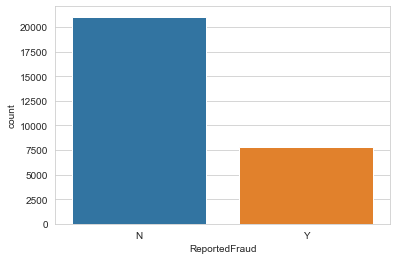

In [7]:
sns.set_style('whitegrid')#gridlines
sns.countplot(x='ReportedFraud',data=Train_Merged)

In [8]:
####Initiate a class to make graphs and charts
class GraphAndCharts:
    
    #Function to create countplot of categorical features with target variable
    def countplots(self, dataframe, column, hue):
        plt.figure(figsize = (10, 10))
        sns.countplot(dataframe[column], hue = hue)
        plt.legend()
        plt.xticks(rotation = 90)
        plt.title('Distribution of Claim Frauds by {}.'.format(column))
        plt.show()
      
    #Function to create heatmap of numerical features
    def heatmaps(self, dataframe):
        plt.figure(figsize = (10, 10))
        sns.heatmap(dataframe.corr(), annot = True, cmap = 'Blues')
        plt.title('Correlation matrix for numerical features')
        plt.savefig("heatmap.png")
        plt.show()
        
    #Function to create pairplot of numerical features with target variable
    def pairplots(self, dataframe):
        plt.figure(figsize = (20, 20))
        sns.pairplot(dataframe)
        plt.title('Scatter and Density plot')
        plt.show()
        
    #Function to create boxplot of numerical features   
    def boxplots(self, dataframe): 
        plt.figure(figsize = (20, 20))
        sns.boxplot(dataframe)
        plt.title('Box plot')
        plt.show()
        

In [9]:
##Initiate a GraphAndCharts object
gc = GraphAndCharts()

In [10]:
Train_Merged.dtypes

CustomerID                object
DateOfIncident            object
TypeOfIncident            object
TypeOfCollission          object
SeverityOfIncident        object
AuthoritiesContacted      object
IncidentState             object
IncidentCity              object
IncidentAddress           object
IncidentTime               int64
NumberOfVehicles           int64
PropertyDamage             int64
BodilyInjuries             int64
Witnesses                  int64
PoliceReport               int64
AmountOfTotalClaim       float64
AmountOfInjuryClaim        int64
AmountOfPropertyClaim      int64
AmountOfVehicleDamage      int64
InsuredAge                 int64
InsuredZipCode             int64
InsuredGender             object
InsuredEducationLevel     object
InsuredOccupation         object
InsuredHobbies            object
CapitalGains               int64
CapitalLoss                int64
InsurancePolicyNumber      int64
CustomerLoyaltyPeriod      int64
DateOfPolicyCoverage      object
InsuranceP

Note : converting Some of the columns into object type So, that it will be easy to do visualization.. i.e.,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses 

In [11]:
Train_Merged[['TypeOfCollission','NumberOfVehicles','PropertyDamage','BodilyInjuries','Witnesses']] = Train_Merged[['TypeOfCollission','NumberOfVehicles','PropertyDamage','BodilyInjuries','Witnesses']].astype(object)
Test_Merged[['TypeOfCollission','NumberOfVehicles','PropertyDamage','BodilyInjuries','Witnesses']] = Test_Merged[['TypeOfCollission','NumberOfVehicles','PropertyDamage','BodilyInjuries','Witnesses']].astype(object)

In [12]:
#Dropping the  features as they are  not impacted on our target feature
Train_Merged=Train_Merged.drop(['DateOfIncident','IncidentAddress','VehicleID','InsuredZipCode'],axis=1)
Test_Merged=Test_Merged.drop(['DateOfIncident','IncidentAddress','VehicleID','InsuredZipCode'],axis=1)

In [13]:
Train_Merged.dtypes

CustomerID                object
TypeOfIncident            object
TypeOfCollission          object
SeverityOfIncident        object
AuthoritiesContacted      object
IncidentState             object
IncidentCity              object
IncidentTime               int64
NumberOfVehicles          object
PropertyDamage            object
BodilyInjuries            object
Witnesses                 object
PoliceReport               int64
AmountOfTotalClaim       float64
AmountOfInjuryClaim        int64
AmountOfPropertyClaim      int64
AmountOfVehicleDamage      int64
InsuredAge                 int64
InsuredGender             object
InsuredEducationLevel     object
InsuredOccupation         object
InsuredHobbies            object
CapitalGains               int64
CapitalLoss                int64
InsurancePolicyNumber      int64
CustomerLoyaltyPeriod      int64
DateOfPolicyCoverage      object
InsurancePolicyState      object
Policy_Deductible          int64
PolicyAnnualPremium      float64
UmbrellaLi

In [14]:
##Split features into numerical and categorical features
num = Train_Merged.select_dtypes(include = np.number)
cat = Train_Merged.select_dtypes(exclude = np.number)

num_test = Test_Merged.select_dtypes(include = np.number)
cat_test = Test_Merged.select_dtypes(exclude = np.number)

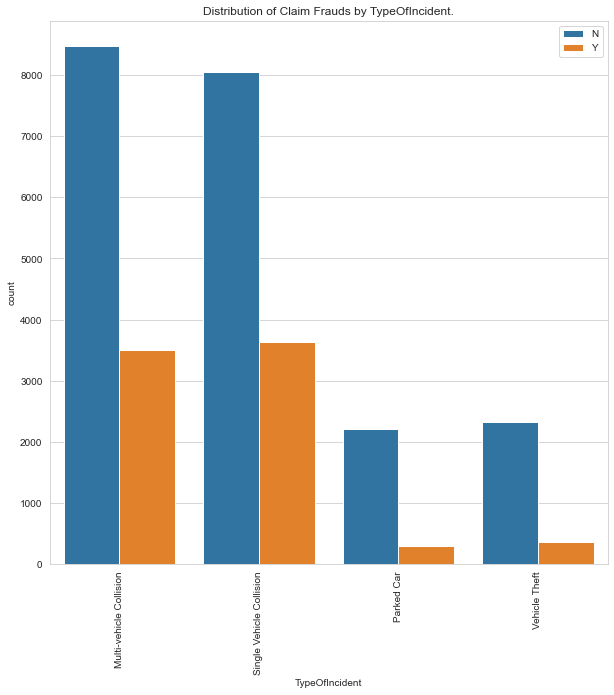

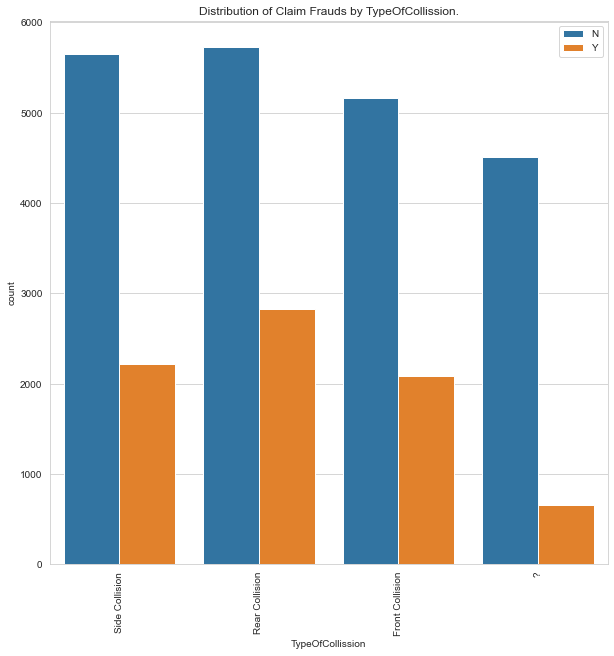

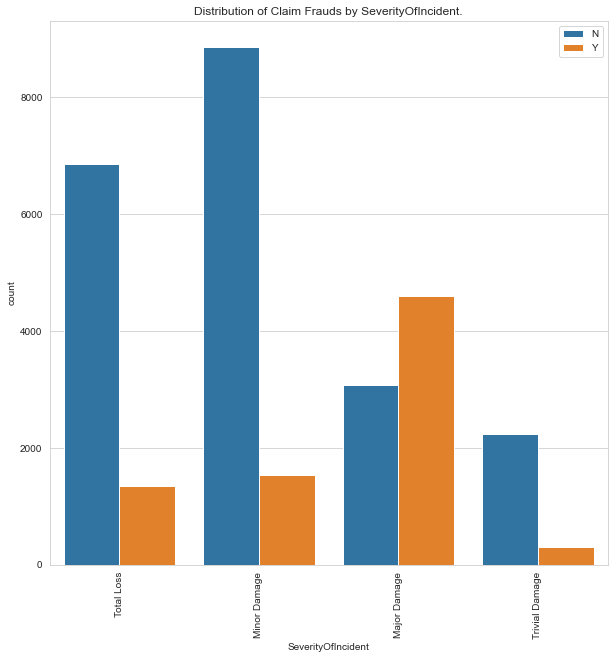

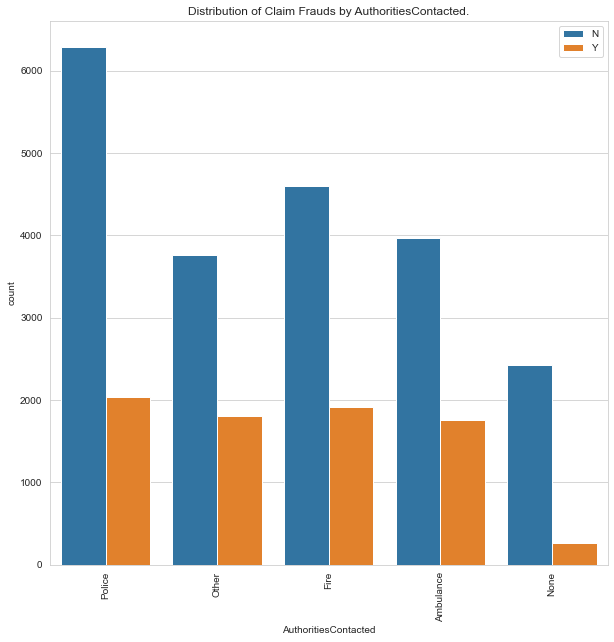

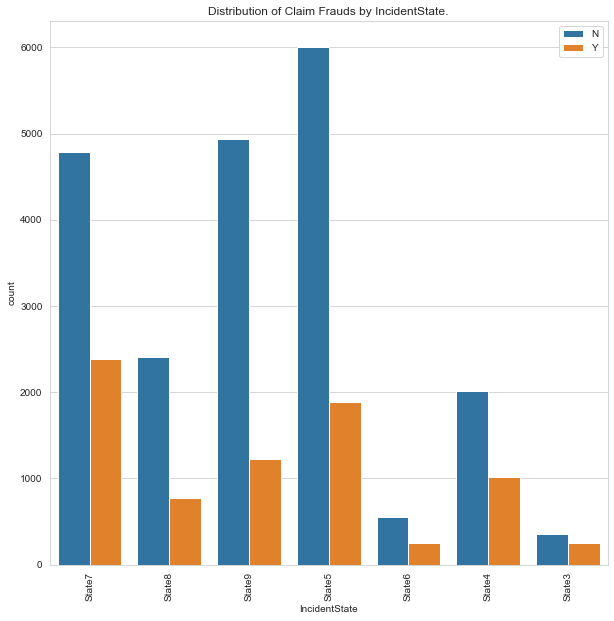

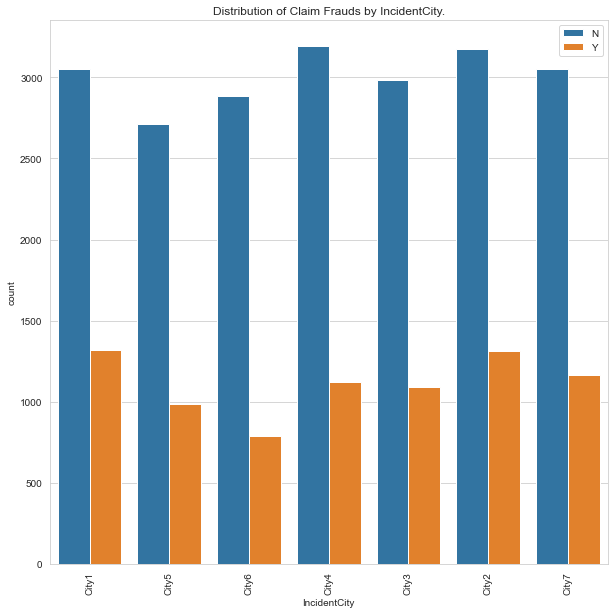

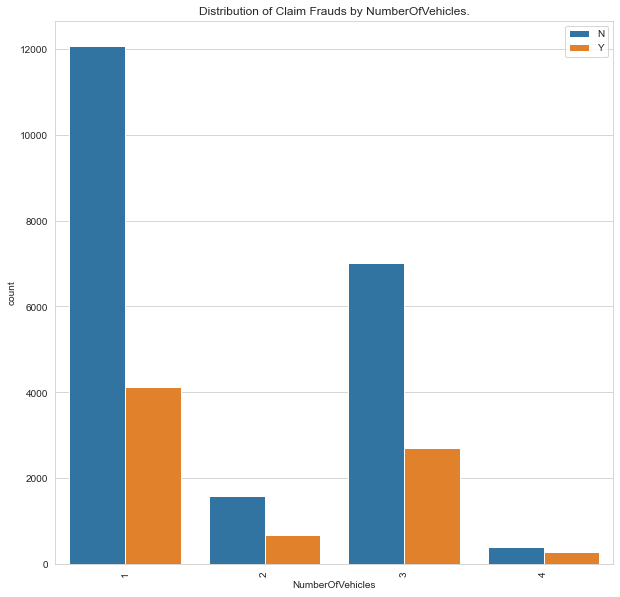

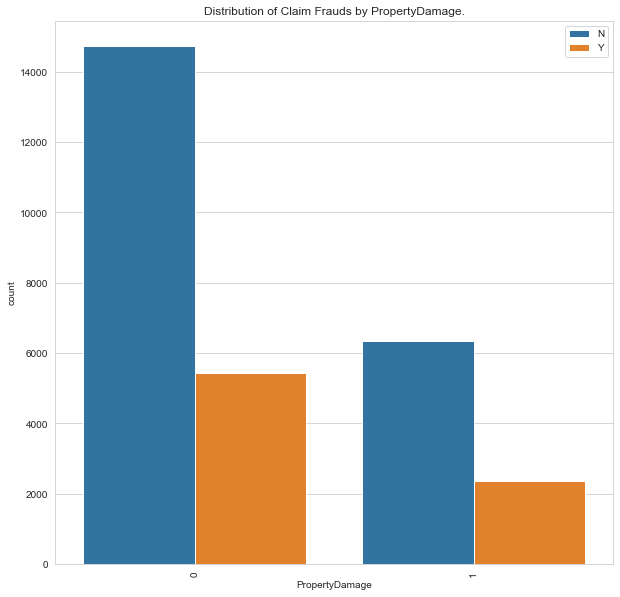

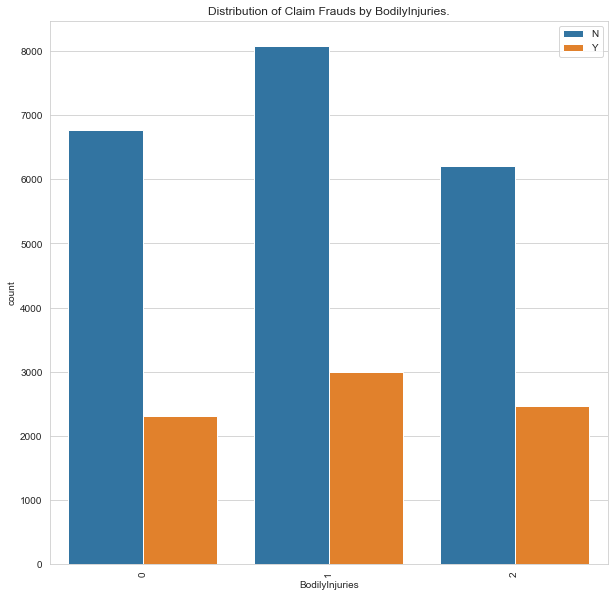

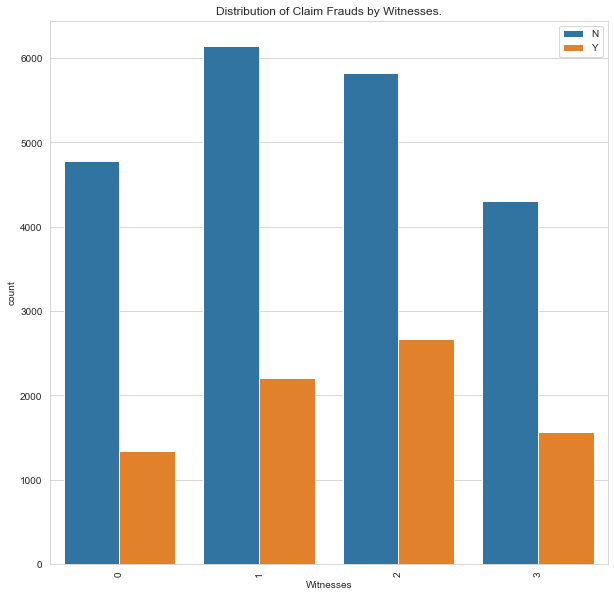

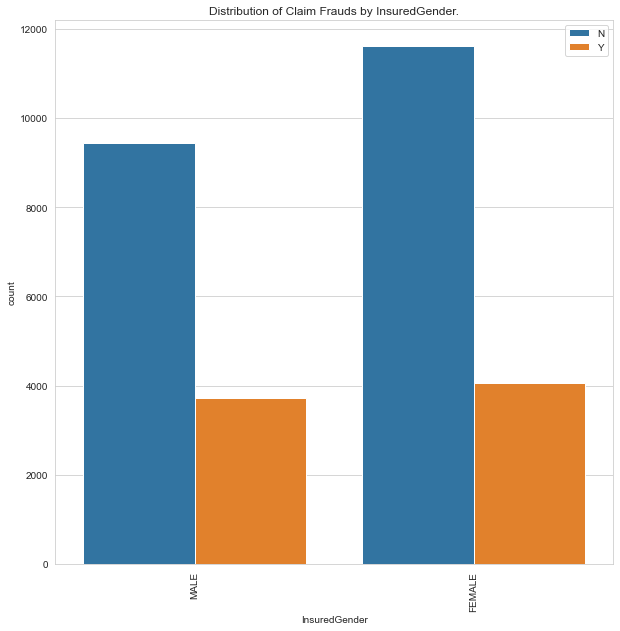

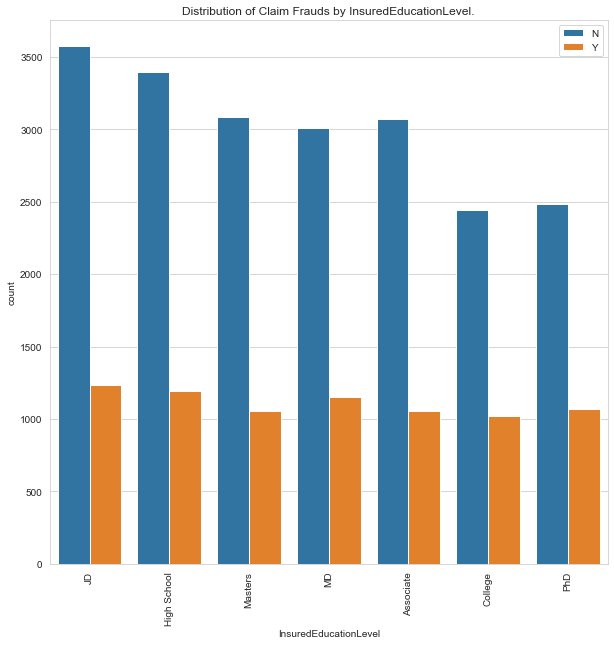

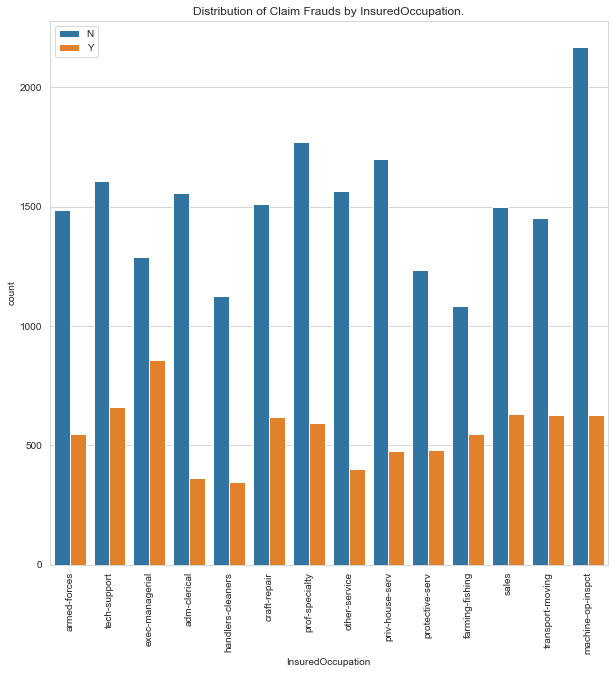

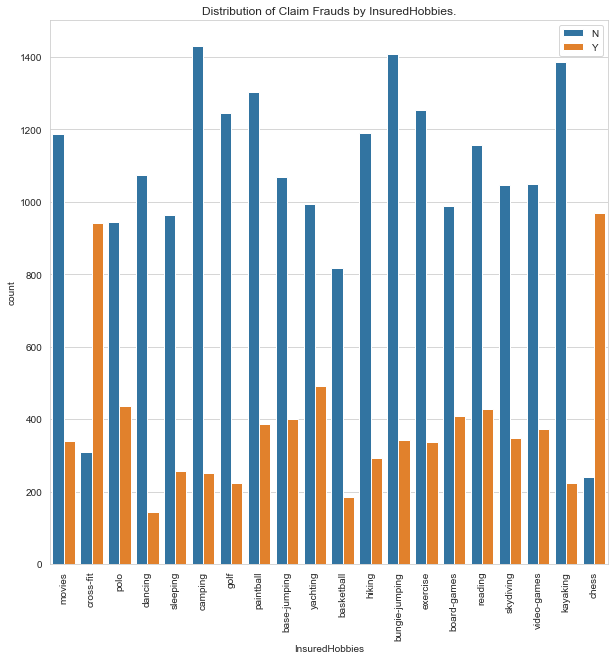

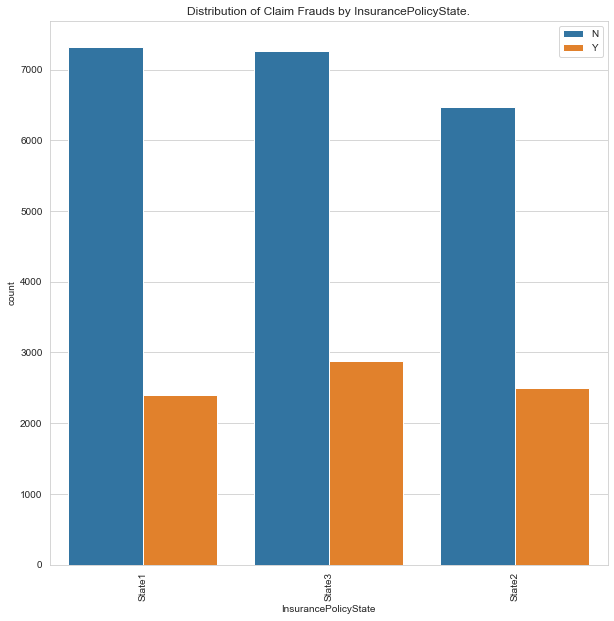

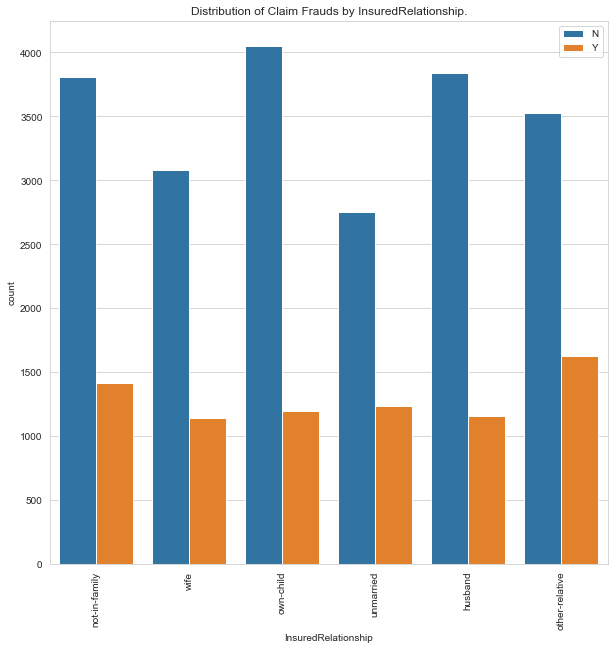

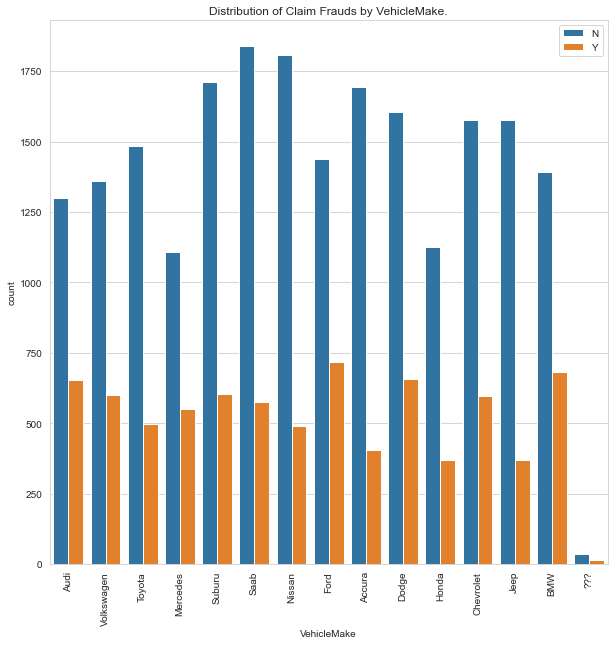

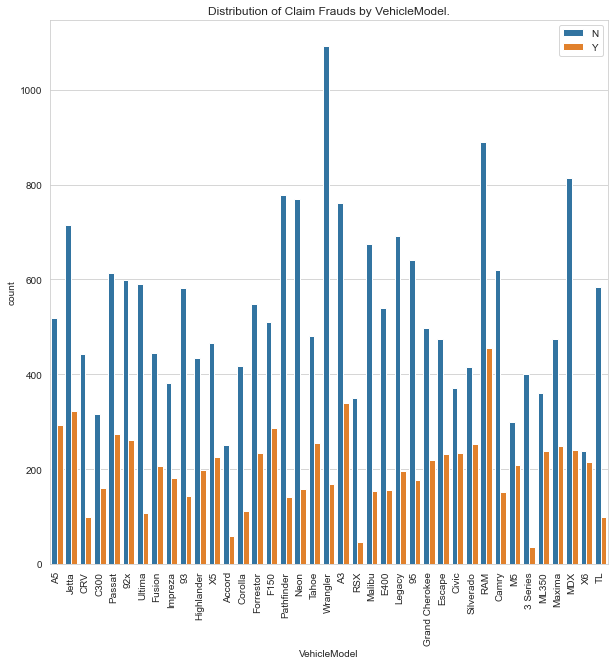

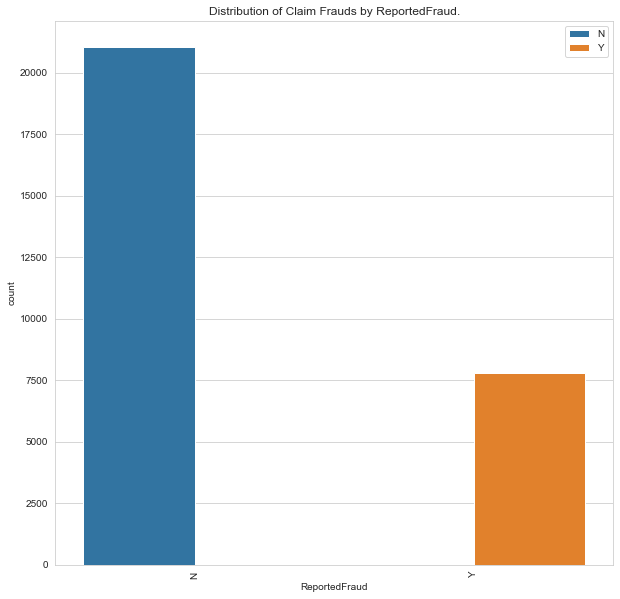

In [15]:
#Make countplots for categorical features
for column in cat:
    if cat[column].nunique() < 50:
        gc.countplots(cat, column, Train_Merged['ReportedFraud'])

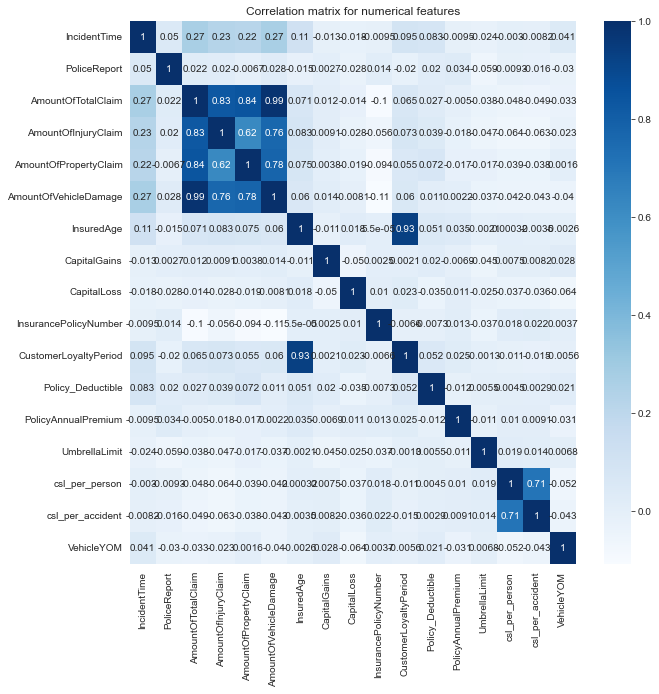

In [16]:
##Make heatmap of numerical features
gc.heatmaps(num)

<Figure size 1440x1440 with 0 Axes>

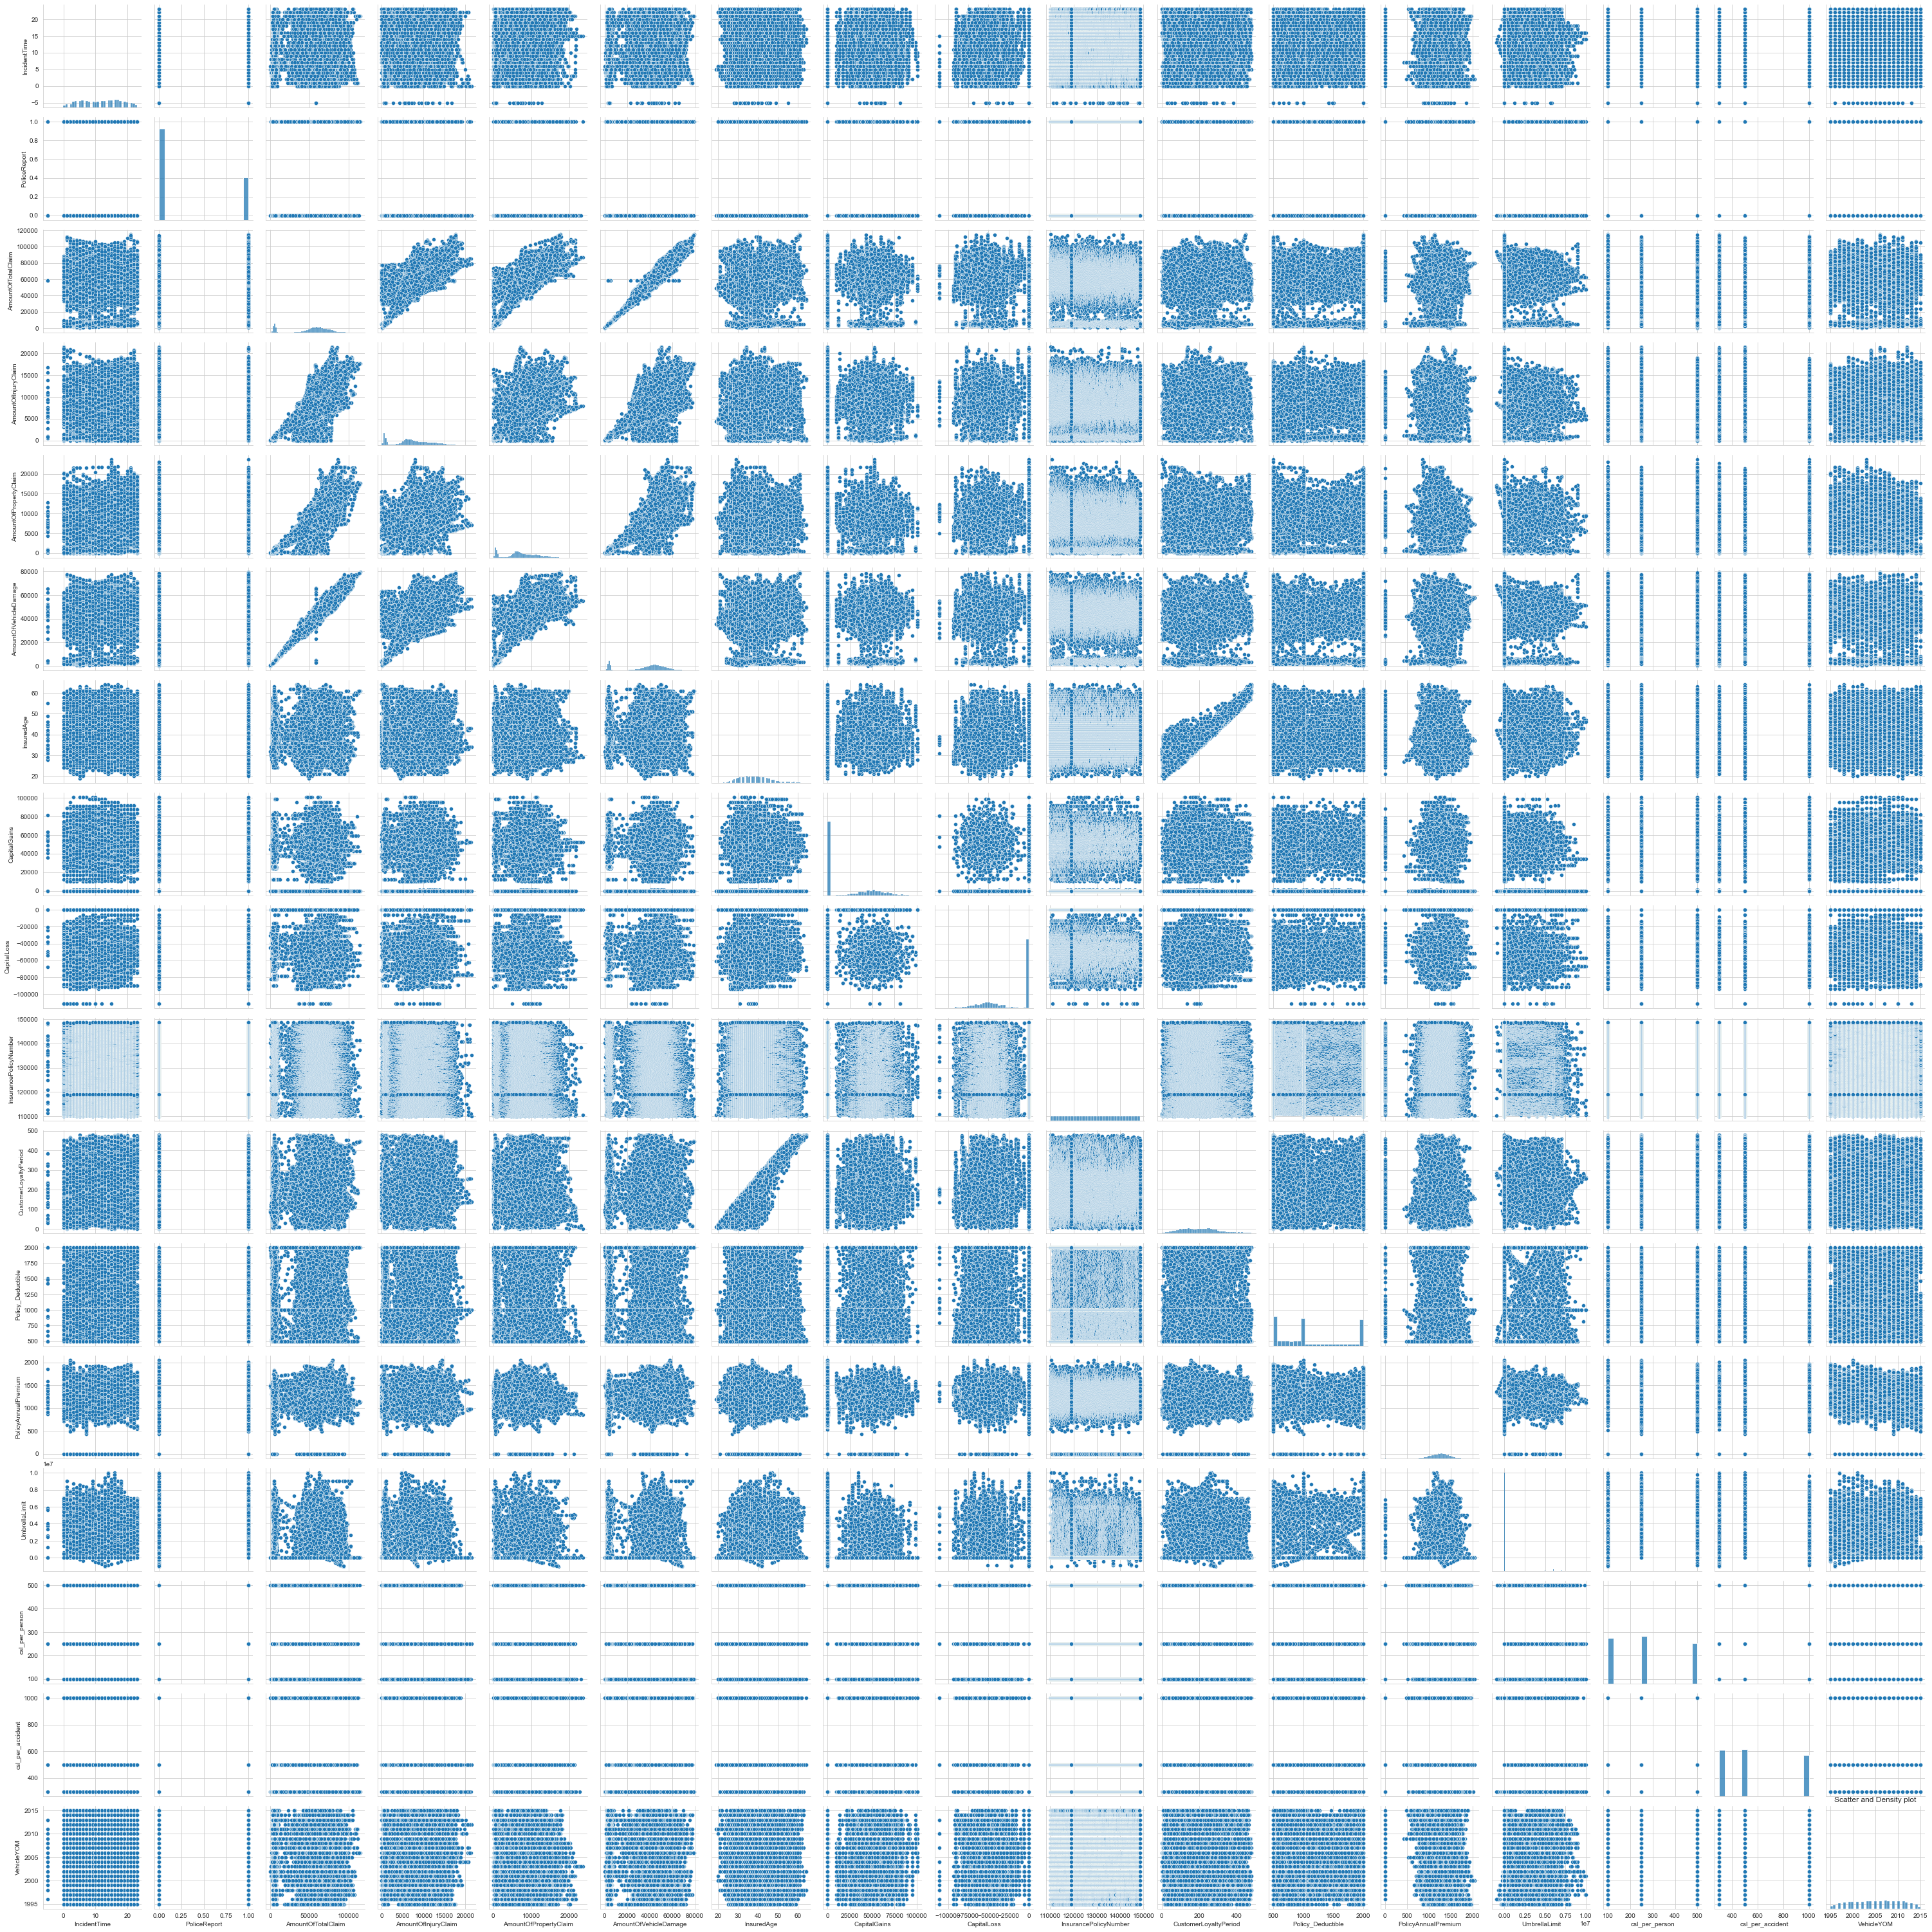

In [17]:
###Make paiplot of Numerical features, with distribution as target variable
gc.pairplots(num)

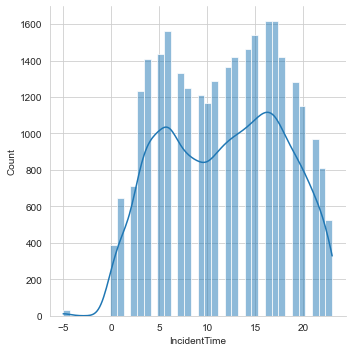

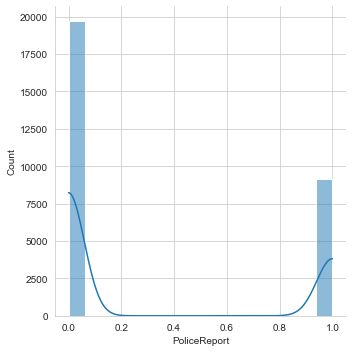

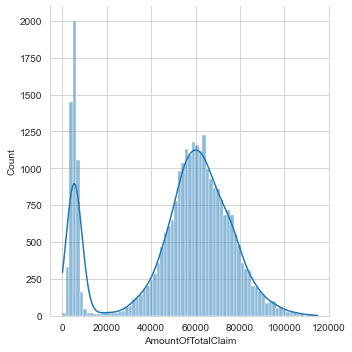

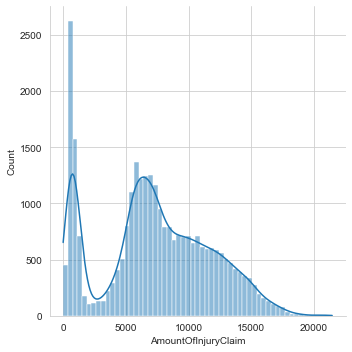

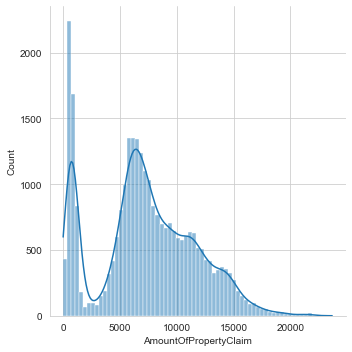

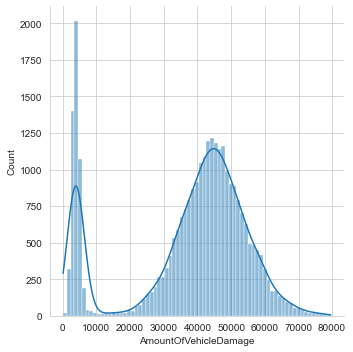

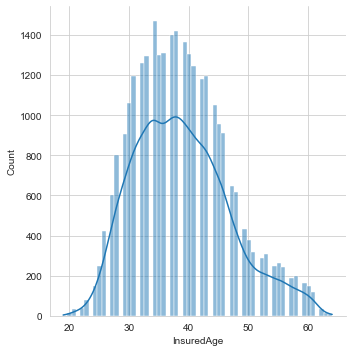

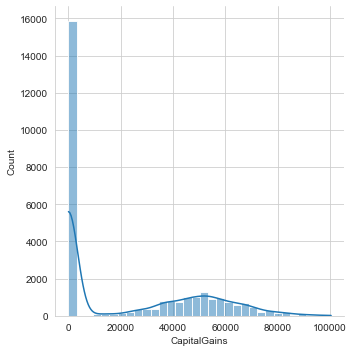

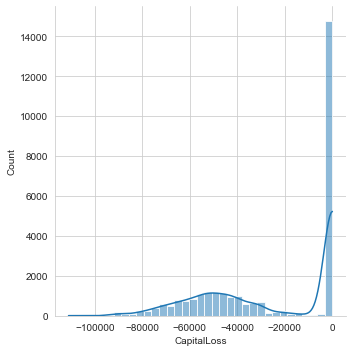

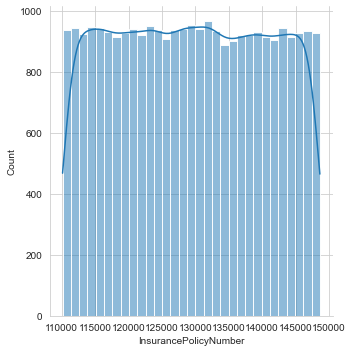

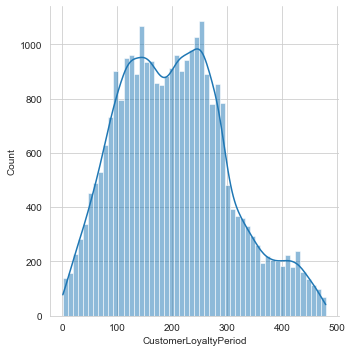

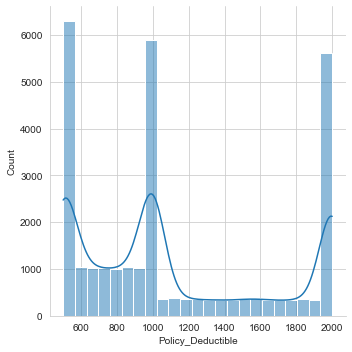

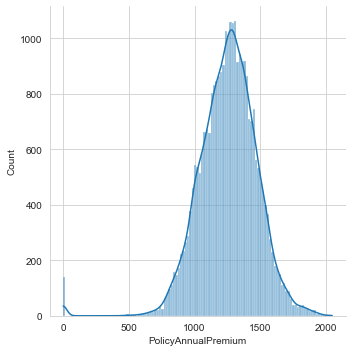

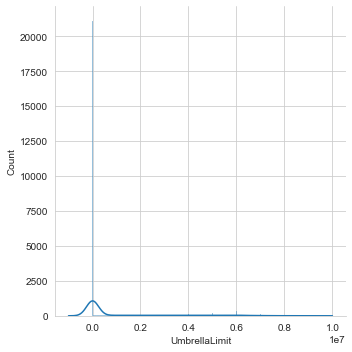

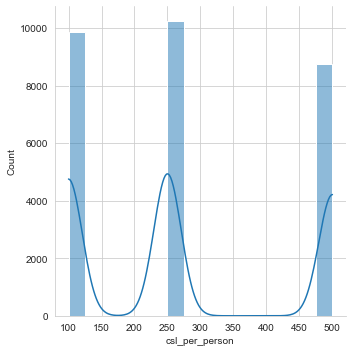

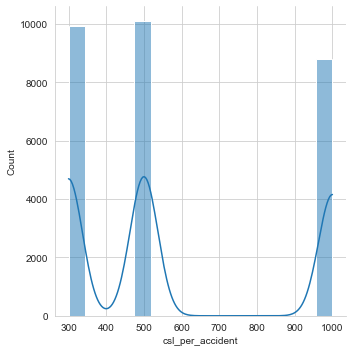

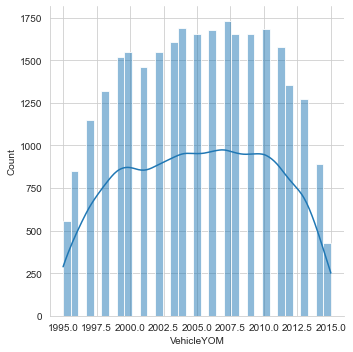

In [18]:
for col in Train_Merged.select_dtypes(include=[np.number]):
    sns.displot(Train_Merged[col], kde = True)

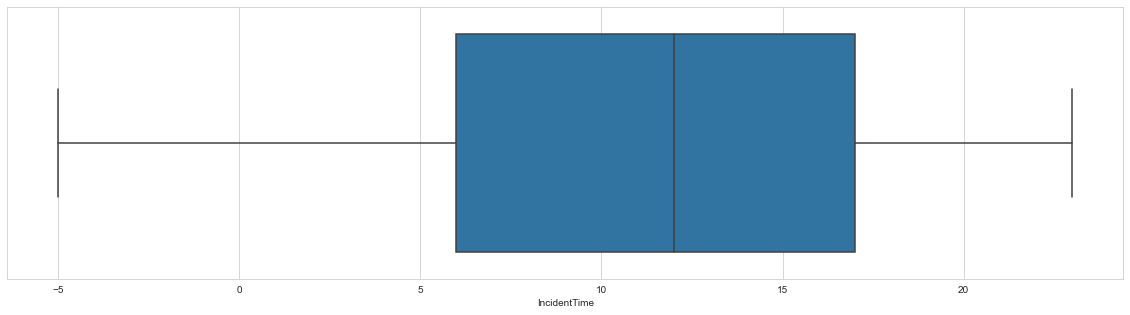

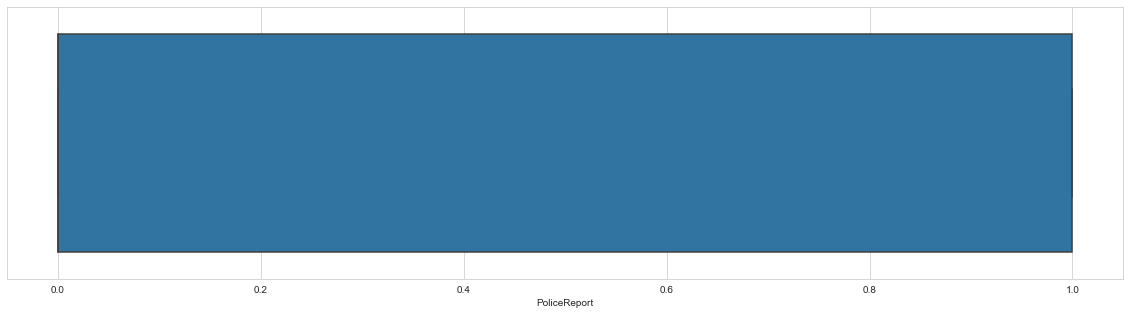

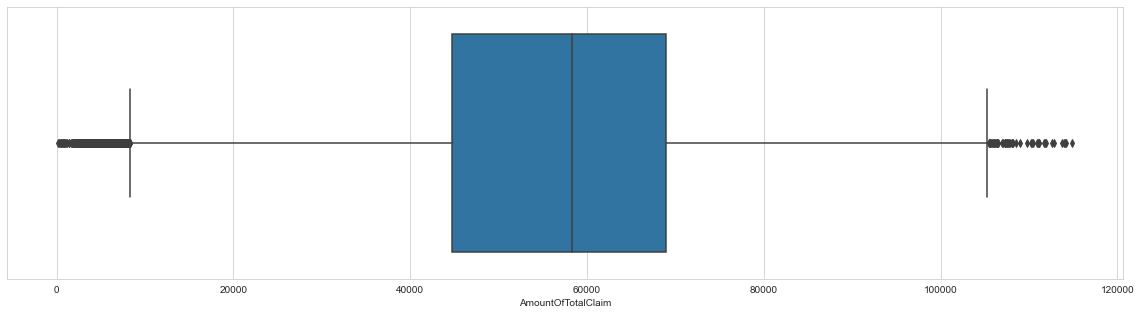

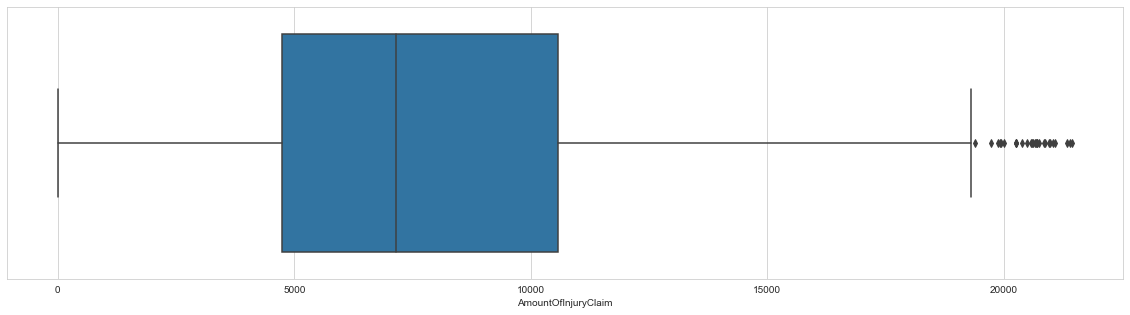

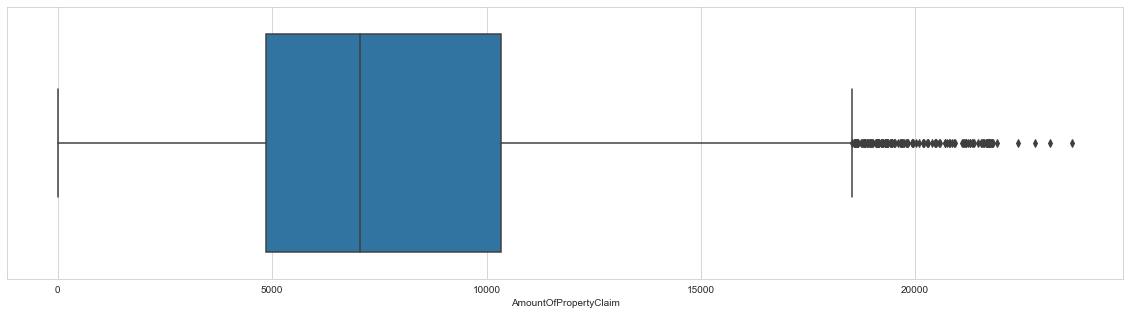

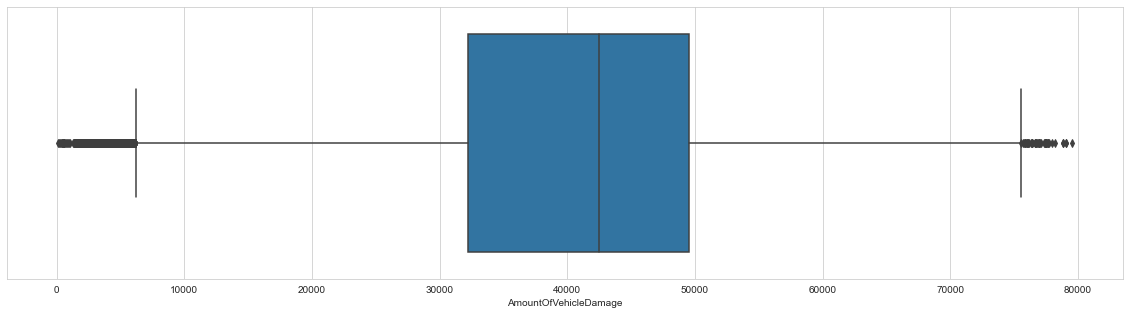

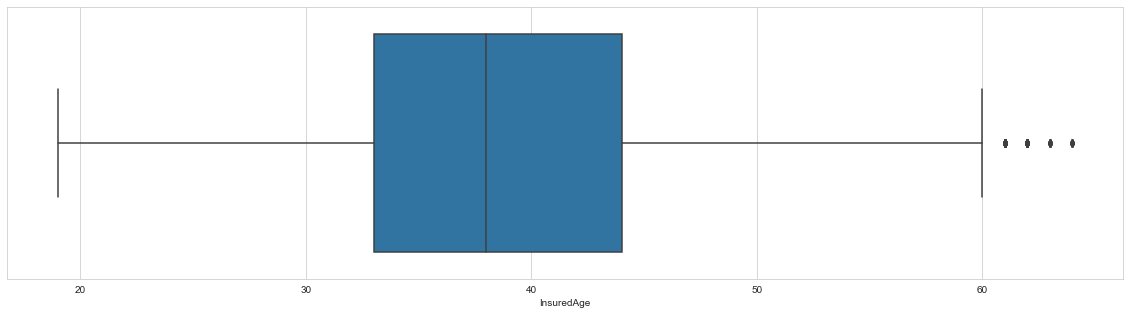

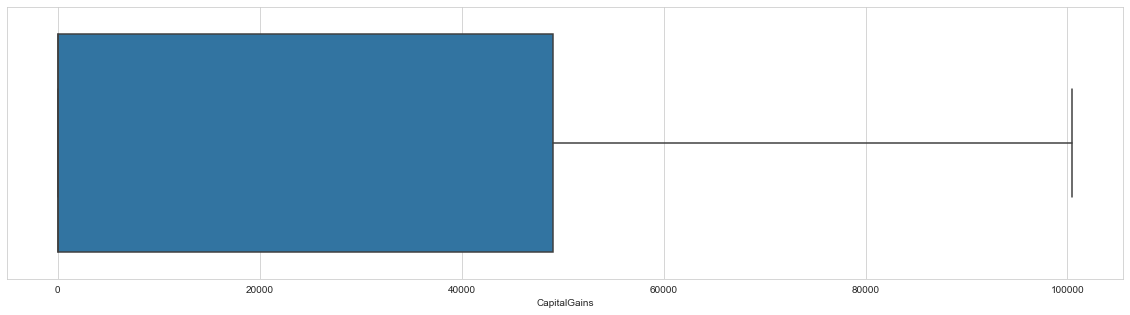

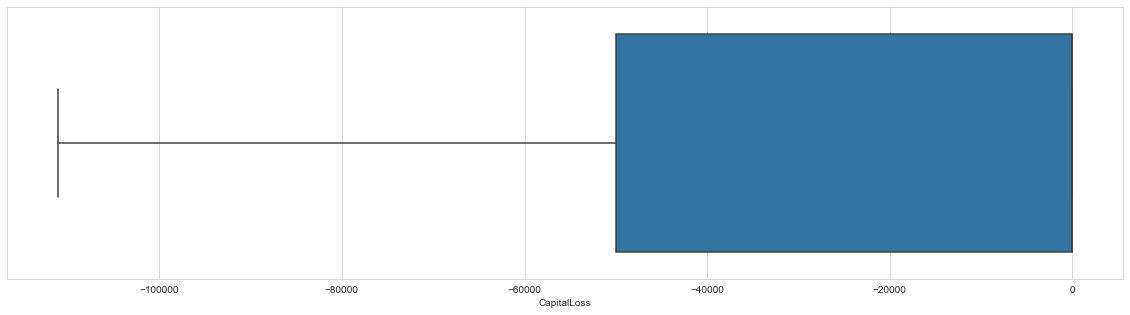

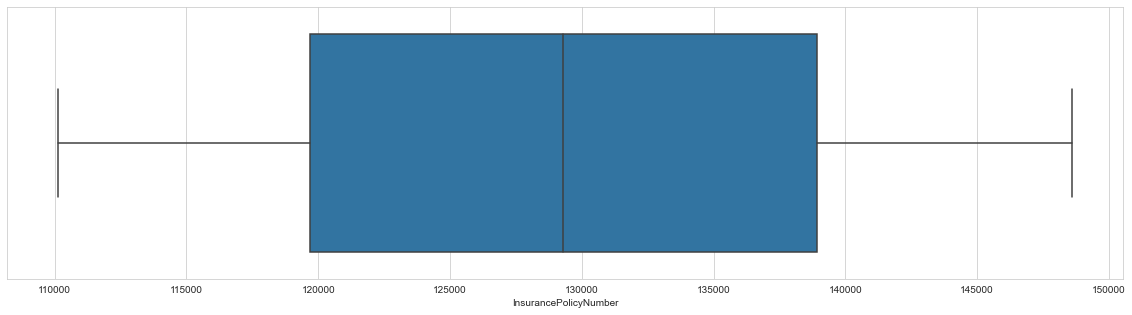

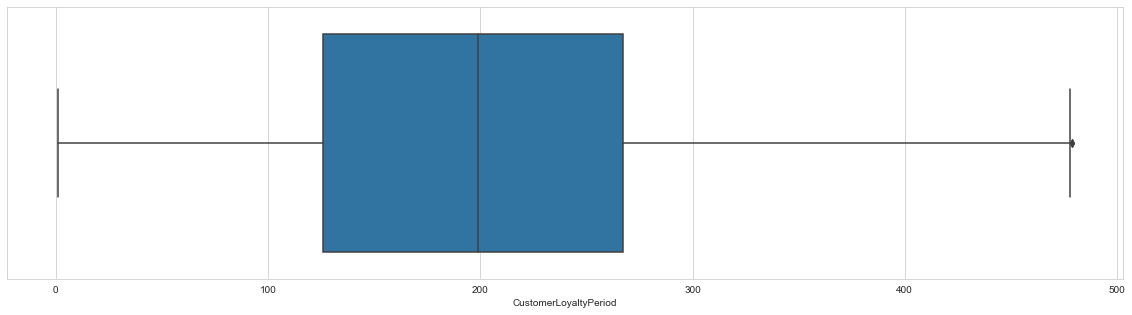

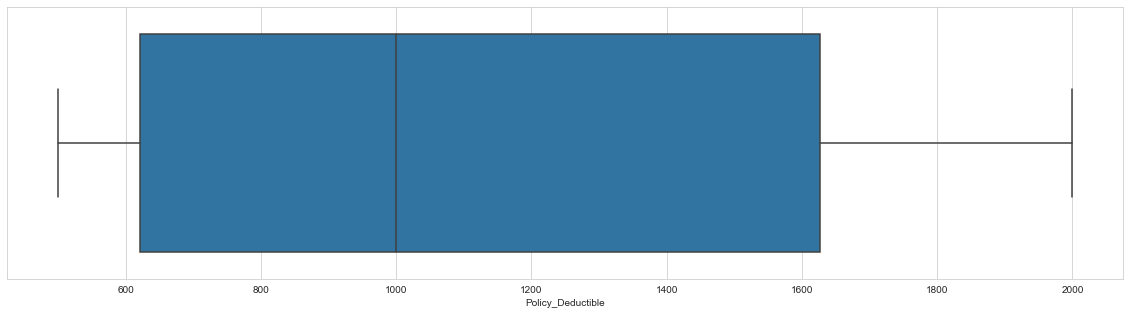

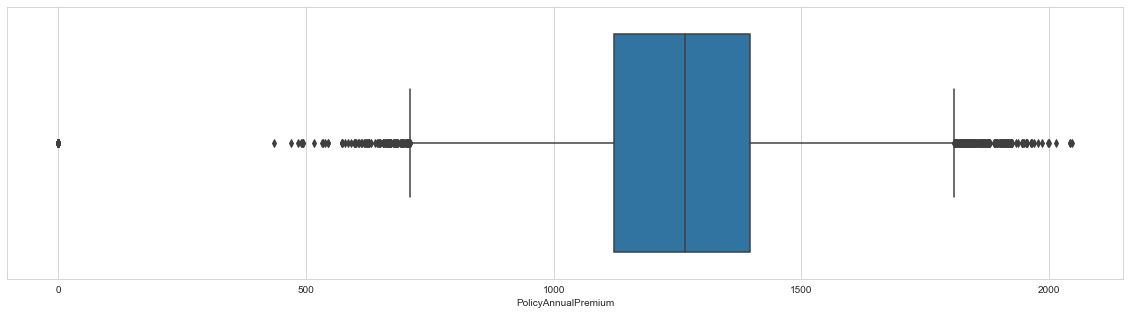

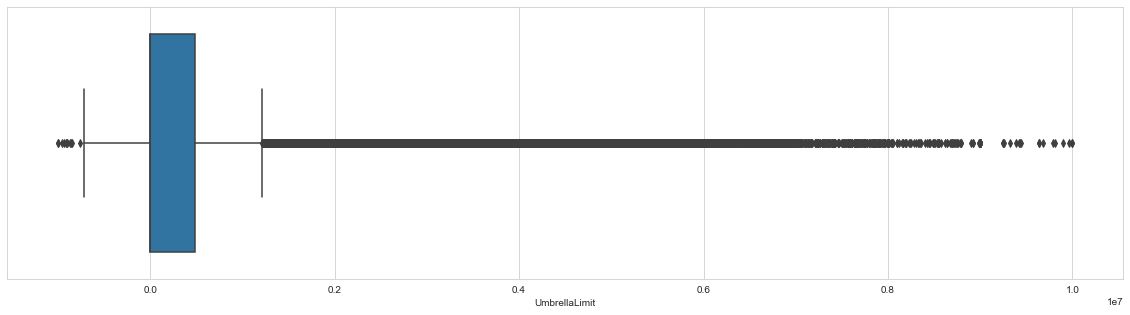

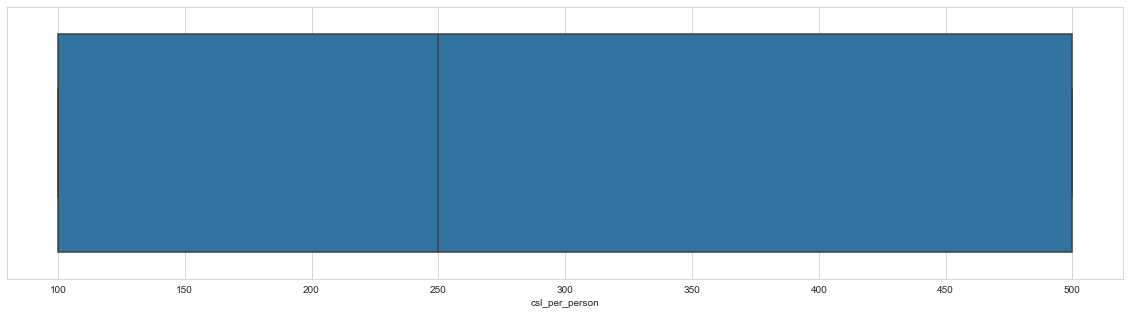

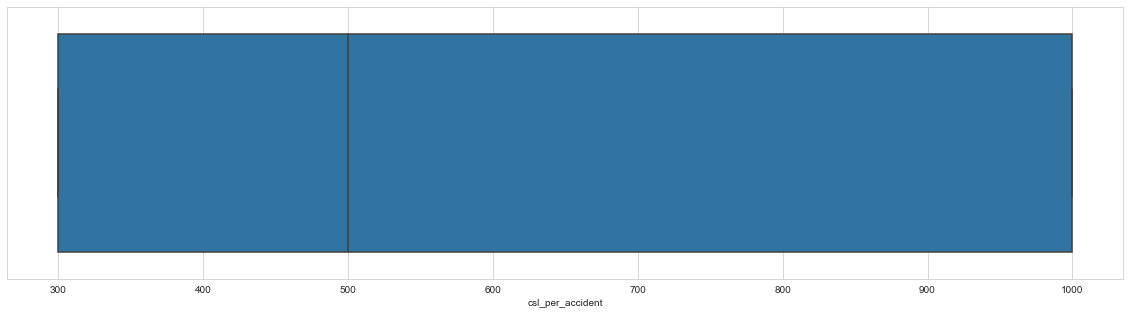

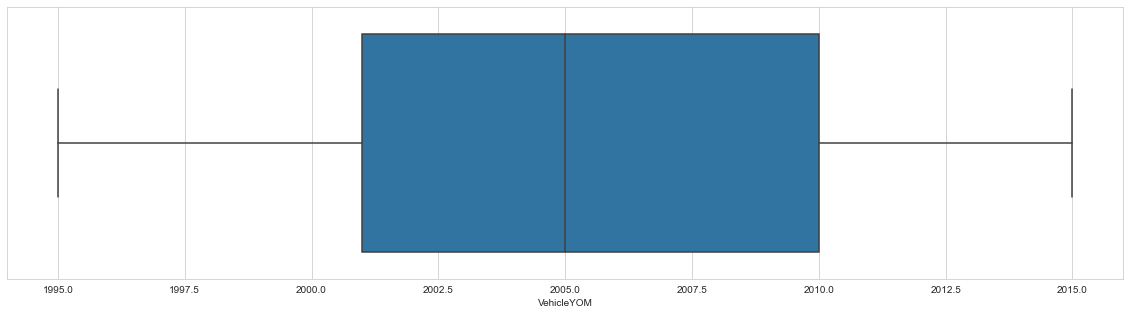

In [19]:
#Boxplot for outlier detection
for col in Train_Merged.select_dtypes(include=[np.number]):
    plt.figure(figsize=(20,5))
    sns.boxplot(Train_Merged[col])
    plt.show()

In [20]:
#Finding the Boundary Values
#Outlier Detection  for AmountOfInjuryClaim
q1 = np.percentile(Train_Merged["AmountOfTotalClaim"],25)
q3 = np.percentile(Train_Merged["AmountOfTotalClaim"],75)
iqr = q3-q1
upper = q3+1.5*iqr
lower = q1-1.5*iqr
Train_Merged[(Train_Merged["AmountOfTotalClaim"]>upper) | (Train_Merged["AmountOfTotalClaim"]<lower)].shape[0]

q1_test = np.percentile(Test_Merged["AmountOfTotalClaim"],25)
q3_test = np.percentile(Test_Merged["AmountOfTotalClaim"],75)
iqr_test = q3_test-q1_test
upper_test = q3_test+1.5*iqr_test
lower_test = q1_test-1.5*iqr_test
Test_Merged[(Test_Merged["AmountOfTotalClaim"]>upper_test) | (Test_Merged["AmountOfTotalClaim"]<lower_test)].shape[0]

66

In [21]:
#Capping for train
Train_Merged['AmountOfTotalClaim'] = np.where(
    Train_Merged['AmountOfTotalClaim'] > upper,
    upper,
    np.where(
        Train_Merged['AmountOfTotalClaim'] < lower,
        lower,
        Train_Merged['AmountOfTotalClaim']
    )
)

#Capping for test
Test_Merged['AmountOfTotalClaim'] = np.where(
    Test_Merged['AmountOfTotalClaim'] > upper_test,
    upper_test,
    np.where(
        Test_Merged['AmountOfTotalClaim'] < lower_test,
        lower_test,
        Test_Merged['AmountOfTotalClaim']
    )
)

<AxesSubplot:xlabel='AmountOfTotalClaim'>

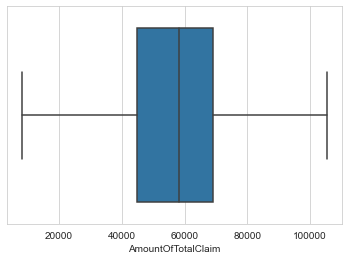

In [22]:
sns.boxplot(Train_Merged['AmountOfTotalClaim'])

In [23]:
###############################################

Note : Since AmountOfInjuryClaim is a skewed data we can use IQR method of outlier detection

In [24]:
#Outlier Detection  for AmountOfInjuryClaim
q1 = np.percentile(Train_Merged["AmountOfInjuryClaim"],25)
q3 = np.percentile(Train_Merged["AmountOfInjuryClaim"],75)
iqr = q3-q1
upper = q3+1.5*iqr
lower = q1-1.5*iqr
print("No of outliers found : ",Train_Merged[(Train_Merged["AmountOfInjuryClaim"]>upper) | (Train_Merged["AmountOfInjuryClaim"]<lower)].shape[0])

q1_test = np.percentile(Test_Merged["AmountOfInjuryClaim"],25)
q3_test = np.percentile(Test_Merged["AmountOfInjuryClaim"],75)
iqr_test = q3_test-q1_test
upper_test = q3_test+1.5*iqr_test
lower_test = q1_test-1.5*iqr_test
print("No of outliers found : ",Test_Merged[(Test_Merged["AmountOfInjuryClaim"]>upper_test) | (Test_Merged["AmountOfInjuryClaim"]<lower_test)].shape[0])

No of outliers found :  28
No of outliers found :  9


As we can see there are 28 datapoints are detected as outliers according to IQR method

In [25]:
#Capping for train
Train_Merged['AmountOfInjuryClaim'] = np.where(
    Train_Merged['AmountOfInjuryClaim'] > upper,
    upper,
    np.where(
        Train_Merged['AmountOfInjuryClaim'] < lower,
        lower,
        Train_Merged['AmountOfInjuryClaim']
    )
)

#Capping for test
Test_Merged['AmountOfInjuryClaim'] = np.where(
    Test_Merged['AmountOfInjuryClaim'] > upper_test,
    upper_test,
    np.where(
        Test_Merged['AmountOfInjuryClaim'] < lower_test,
        lower_test,
        Test_Merged['AmountOfInjuryClaim']
    )
)

<AxesSubplot:xlabel='AmountOfInjuryClaim'>

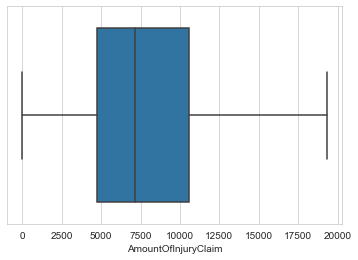

In [26]:
sns.boxplot(Train_Merged['AmountOfInjuryClaim'])

As we can see thereare no more outliers now.

In [27]:
#######################################################3

Note : Since AmountOfPropertyClaim is a skewed data we can use IQR method of outlier detection

In [28]:
#Outlier Detection  for AmountOfPropertyClaim
q1 = np.percentile(Train_Merged["AmountOfPropertyClaim"],25)
q3 = np.percentile(Train_Merged["AmountOfPropertyClaim"],75)
iqr = q3-q1
upper = q3+1.5*iqr
lower = q1-1.5*iqr
print("No of outliers found : ",Train_Merged[(Train_Merged["AmountOfPropertyClaim"]>upper) | (Train_Merged["AmountOfPropertyClaim"]<lower)].shape[0])

q1_test = np.percentile(Test_Merged["AmountOfPropertyClaim"],25)
q3_test = np.percentile(Test_Merged["AmountOfPropertyClaim"],75)
iqr_test = q3_test-q1_test
upper_test = q3_test+1.5*iqr_test
lower_test = q1_test-1.5*iqr_test
print("No of outliers found : ",Test_Merged[(Test_Merged["AmountOfPropertyClaim"]>upper_test) | (Test_Merged["AmountOfPropertyClaim"]<lower_test)].shape[0])

No of outliers found :  156
No of outliers found :  29


In [29]:
#Capping
Train_Merged['AmountOfPropertyClaim'] = np.where(
    Train_Merged['AmountOfPropertyClaim'] > upper,
    upper,
    np.where(
        Train_Merged['AmountOfPropertyClaim'] < lower,
        lower,
        Train_Merged['AmountOfPropertyClaim']
    )
)

#Capping
Test_Merged['AmountOfPropertyClaim'] = np.where(
    Test_Merged['AmountOfPropertyClaim'] > upper_test,
    upper_test,
    np.where(
        Test_Merged['AmountOfPropertyClaim'] < lower_test,
        lower_test,
        Test_Merged['AmountOfPropertyClaim']
    )
)

<AxesSubplot:xlabel='AmountOfPropertyClaim'>

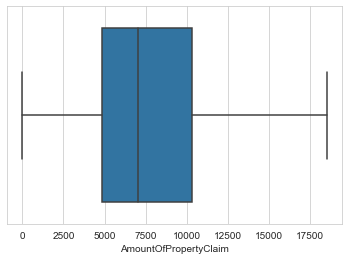

In [30]:
sns.boxplot(Train_Merged['AmountOfPropertyClaim'])

Here we can see the difference that the amount of outliers are reduced

In [31]:
##############################################################3

In [32]:
#Outlier Detection  for AmountOfPropertyClaim
q1 = np.percentile(Train_Merged["AmountOfVehicleDamage"],25)
q3 = np.percentile(Train_Merged["AmountOfVehicleDamage"],75)
iqr = q3-q1
upper = q3+1.5*iqr
lower = q1-1.5*iqr
print("No of outliers found : ",Train_Merged[(Train_Merged["AmountOfVehicleDamage"]>upper) | (Train_Merged["AmountOfVehicleDamage"]<lower)].shape[0])

q1_test = np.percentile(Test_Merged["AmountOfVehicleDamage"],25)
q3_test = np.percentile(Test_Merged["AmountOfVehicleDamage"],75)
iqr_test = q3_test-q1_test
upper_test = q3_test+1.5*iqr_test
lower_test = q1_test-1.5*iqr_test
print("No of outliers found : ",Test_Merged[(Test_Merged["AmountOfVehicleDamage"]>upper_test) | (Test_Merged["AmountOfVehicleDamage"]<lower_test)].shape[0])

No of outliers found :  5009
No of outliers found :  16


In [33]:
#Capping
Train_Merged['AmountOfVehicleDamage'] = np.where(
    Train_Merged['AmountOfVehicleDamage'] > upper,
    upper,
    np.where(
        Train_Merged['AmountOfVehicleDamage'] < lower,
        lower,
        Train_Merged['AmountOfVehicleDamage']
    )
)

#Capping
Test_Merged['AmountOfVehicleDamage'] = np.where(
    Test_Merged['AmountOfVehicleDamage'] > upper_test,
    upper_test,
    np.where(
        Test_Merged['AmountOfVehicleDamage'] < lower_test,
        lower_test,
        Test_Merged['AmountOfVehicleDamage']
    )
)

<AxesSubplot:xlabel='AmountOfVehicleDamage'>

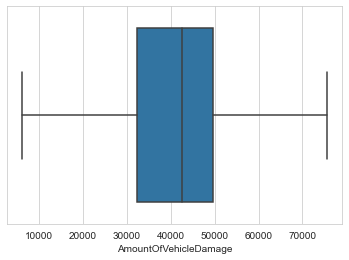

In [34]:
sns.boxplot(Train_Merged['AmountOfVehicleDamage'])

As we can see there are 5009 datapoints are detected as outliers according to IQR method

In [35]:
##########################################################

In [36]:
#Outlier Detection  for InsuredAge
q1 = np.percentile(Train_Merged["InsuredAge"],25)
q3 = np.percentile(Train_Merged["InsuredAge"],75)
iqr = q3-q1
upper = q3+1.5*iqr
lower = q1-1.5*iqr
print("No of outliers found : ",Train_Merged[(Train_Merged["InsuredAge"]>upper) | (Train_Merged["InsuredAge"]<lower)].shape[0])

q1_test = np.percentile(Test_Merged["InsuredAge"],25)
q3_test = np.percentile(Test_Merged["InsuredAge"],75)
iqr_test = q3_test-q1_test
upper_test = q3_test+1.5*iqr_test
lower_test = q1_test-1.5*iqr_test
print("No of outliers found : ",Test_Merged[(Test_Merged["InsuredAge"]>upper_test) | (Test_Merged["InsuredAge"]<lower_test)].shape[0])

No of outliers found :  176
No of outliers found :  56


In [37]:
#Capping
Train_Merged['InsuredAge'] = np.where(
    Train_Merged['InsuredAge'] > upper,
    upper,
    np.where(
        Train_Merged['InsuredAge'] < lower,
        lower,
        Train_Merged['InsuredAge']
    )
)

Test_Merged['InsuredAge'] = np.where(
    Test_Merged['InsuredAge'] > upper_test,
    upper_test,
    np.where(
        Test_Merged['InsuredAge'] < lower_test,
        lower_test,
        Test_Merged['InsuredAge']
    )
)

<AxesSubplot:xlabel='InsuredAge'>

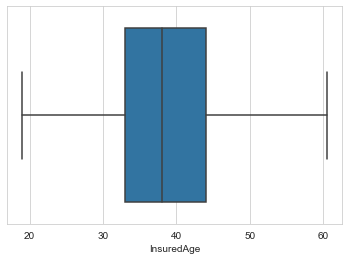

In [38]:
sns.boxplot(Train_Merged['InsuredAge'])

In [39]:
#####################################################33

In [40]:
#Outlier Detection  for AmountOfPropertyClaim
q1 = np.percentile(Train_Merged["CustomerLoyaltyPeriod"],25)
q3 = np.percentile(Train_Merged["CustomerLoyaltyPeriod"],75)
iqr = q3-q1
upper = q3+1.5*iqr
lower = q1-1.5*iqr
print("No of outliers found : ", Train_Merged[(Train_Merged["CustomerLoyaltyPeriod"]>upper) | (Train_Merged["CustomerLoyaltyPeriod"]<lower)].shape[0])

q1_test = np.percentile(Test_Merged["CustomerLoyaltyPeriod"],25)
q3_test = np.percentile(Test_Merged["CustomerLoyaltyPeriod"],75)
iqr_test = q3_test-q1_test
upper_test = q3_test+1.5*iqr_test
lower_test = q1_test-1.5*iqr_test
print("No of outliers found : ",Test_Merged[(Test_Merged["CustomerLoyaltyPeriod"]>upper_test) | (Test_Merged["CustomerLoyaltyPeriod"]<lower_test)].shape[0])

No of outliers found :  2
No of outliers found :  12


In [41]:
#Capping
Train_Merged['CustomerLoyaltyPeriod'] = np.where(
    Train_Merged['CustomerLoyaltyPeriod'] > upper,
    upper,
    np.where(
        Train_Merged['CustomerLoyaltyPeriod'] < lower,
        lower,
        Train_Merged['CustomerLoyaltyPeriod']
    )
)

Test_Merged['CustomerLoyaltyPeriod'] = np.where(
    Test_Merged['CustomerLoyaltyPeriod'] > upper_test,
    upper_test,
    np.where(
        Test_Merged['CustomerLoyaltyPeriod'] < lower_test,
        lower_test,
        Test_Merged['CustomerLoyaltyPeriod']
    )
)

As we can see there are 2 datapoints are detected as outliers according to IQR method

<AxesSubplot:xlabel='CustomerLoyaltyPeriod'>

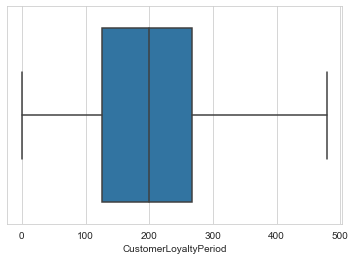

In [42]:
sns.boxplot(Train_Merged['CustomerLoyaltyPeriod'])

In [43]:
#################################################

Since PolicyAnnualPremium is a normal distribution data, we can go for z-score method

In [44]:
print("Highest allowed",Train_Merged['PolicyAnnualPremium'].mean() + 3*Train_Merged['PolicyAnnualPremium'].std())
print("Lowest allowed",Train_Merged['PolicyAnnualPremium'].mean() - 3*Train_Merged['PolicyAnnualPremium'].std())

print("Highest allowed",Test_Merged['PolicyAnnualPremium'].mean() + 3*Test_Merged['PolicyAnnualPremium'].std())
print("Lowest allowed",Test_Merged['PolicyAnnualPremium'].mean() - 3*Test_Merged['PolicyAnnualPremium'].std())

Highest allowed 1924.5700805457593
Lowest allowed 586.4866839153167
Highest allowed 1926.8629030922605
Lowest allowed 580.3042423296345


In [45]:
upper = Train_Merged['PolicyAnnualPremium'].mean() + 3*Train_Merged['PolicyAnnualPremium'].std()
lower = Train_Merged['PolicyAnnualPremium'].mean() - 3*Train_Merged['PolicyAnnualPremium'].std()

upper_test = Test_Merged['PolicyAnnualPremium'].mean() + 3*Test_Merged['PolicyAnnualPremium'].std()
lower_test = Test_Merged['PolicyAnnualPremium'].mean() - 3*Test_Merged['PolicyAnnualPremium'].std()

In [46]:
#Capping
Train_Merged['PolicyAnnualPremium'] = np.where(
    Train_Merged['PolicyAnnualPremium'] > upper,
    upper,
    np.where(
        Train_Merged['PolicyAnnualPremium'] < lower,
        lower,
        Train_Merged['PolicyAnnualPremium']
    )
)

Test_Merged['PolicyAnnualPremium'] = np.where(
    Test_Merged['PolicyAnnualPremium'] > upper_test,
    upper_test,
    np.where(
        Test_Merged['PolicyAnnualPremium'] < lower_test,
        lower_test,
        Test_Merged['PolicyAnnualPremium']
    )
)

<AxesSubplot:xlabel='PolicyAnnualPremium'>

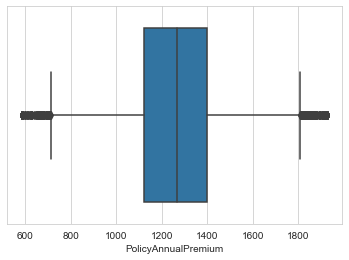

In [47]:
sns.boxplot(Train_Merged['PolicyAnnualPremium'])

In [48]:
Train_Merged.drop(['PolicyAnnualPremium'], axis=1,inplace=True)
Test_Merged.drop(['PolicyAnnualPremium'], axis=1,inplace=True)

In [49]:
################################################

Since can't decribe the distribution of umbrella limit and as we seen in box plot it actually contains more no of outliers we can just drop it out.

In [50]:
Train_Merged.drop(['UmbrellaLimit'], axis=1,inplace=True)
Test_Merged.drop(['UmbrellaLimit'], axis=1,inplace=True)

# Prepare Data for modelling

In [51]:
#converting the object datatype columns to int type i.e,for those which columns are having integer data init
Train_Merged[['NumberOfVehicles','PropertyDamage','BodilyInjuries','Witnesses']] = Train_Merged[['NumberOfVehicles','PropertyDamage','BodilyInjuries','Witnesses']].astype(int)

#converting the object datatype columns to int type i.e,for those which columns are having integer data init
Test_Merged[['NumberOfVehicles','PropertyDamage','BodilyInjuries','Witnesses']] = Test_Merged[['NumberOfVehicles','PropertyDamage','BodilyInjuries','Witnesses']].astype(int)

In [52]:
#checking unique values in cat columns for further processes
print("unique values in TypeOfIncident column : ", Train_Merged['TypeOfIncident'].unique())
print("unique values in SeverityOfIncident column : ",Train_Merged['SeverityOfIncident'].unique())
print("unique values in AuthoritiesContacted column : ",Train_Merged['AuthoritiesContacted'].unique())
print("unique values in IncidentState column : ",Train_Merged['IncidentState'].unique())
print("unique values in IncidentCity column : ",Train_Merged['IncidentCity'].unique())

unique values in TypeOfIncident column :  ['Multi-vehicle Collision' 'Single Vehicle Collision' 'Parked Car'
 'Vehicle Theft']
unique values in SeverityOfIncident column :  ['Total Loss' 'Minor Damage' 'Major Damage' 'Trivial Damage']
unique values in AuthoritiesContacted column :  ['Police' 'Other' 'Fire' 'Ambulance' 'None']
unique values in IncidentState column :  ['State7' 'State8' 'State9' 'State5' 'State6' 'State4' 'State3']
unique values in IncidentCity column :  ['City1' 'City5' 'City6' 'City4' 'City3' 'City2' 'City7']


In [53]:
#Label Encoding for 'TypeOfIncident' column
from sklearn.preprocessing import LabelEncoder
Train_Merged['TypeOfCollission'] = LabelEncoder().fit_transform(Train_Merged['TypeOfCollission'])
Train_Merged.head()

#for test
Test_Merged['TypeOfCollission'] = LabelEncoder().fit_transform(Test_Merged['TypeOfCollission'])

In [54]:
#label encoding for 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'ReportedFraud' or CCN
Train_Merged['SeverityOfIncident']= label_encoder.fit_transform(Train_Merged['SeverityOfIncident'])

Test_Merged['SeverityOfIncident']= label_encoder.fit_transform(Test_Merged['SeverityOfIncident'])


In [55]:
#One Hot Encoding
#OHE to convert categorical to numeric data
dummies = pd.get_dummies(Train_Merged[['TypeOfIncident', 'AuthoritiesContacted', 
                                    'IncidentState','IncidentCity']],drop_first = True)
#concatinating
Train_Merged=pd.concat([Train_Merged,dummies],axis=1)
#Dropping original columns
Train_Merged.drop(['TypeOfIncident', 'AuthoritiesContacted', 
                                    'IncidentState','IncidentCity'], axis=1,inplace=True)

#for test
dummies_test = pd.get_dummies(Test_Merged[['TypeOfIncident', 'AuthoritiesContacted', 
                                    'IncidentState','IncidentCity']],drop_first = True)
#concatinating
Test_Merged=pd.concat([Test_Merged,dummies_test],axis=1)
#Dropping original columns
Test_Merged.drop(['TypeOfIncident', 'AuthoritiesContacted', 
                                    'IncidentState','IncidentCity'], axis=1,inplace=True)

In [56]:
Train_Merged.dtypes

CustomerID                                  object
TypeOfCollission                             int32
SeverityOfIncident                           int32
IncidentTime                                 int64
NumberOfVehicles                             int32
PropertyDamage                               int32
BodilyInjuries                               int32
Witnesses                                    int32
PoliceReport                                 int64
AmountOfTotalClaim                         float64
AmountOfInjuryClaim                        float64
AmountOfPropertyClaim                      float64
AmountOfVehicleDamage                      float64
InsuredAge                                 float64
InsuredGender                               object
InsuredEducationLevel                       object
InsuredOccupation                           object
InsuredHobbies                              object
CapitalGains                                 int64
CapitalLoss                    

In [57]:
#printing unique values 
print("unique values in InsuredGender column : ",Train_Merged['InsuredGender'].unique())
print("unique values in InsuredEducationLevel column : ",Train_Merged['InsuredEducationLevel'].unique())
#printing len ogf unique values
print("len of unique values in InsuredOccupation column : ",len(Train_Merged['InsuredOccupation'].unique()))
print("len of unique values in InsuredHobbies column : ",len(Train_Merged['InsuredHobbies'].unique()))

unique values in InsuredGender column :  ['MALE' 'FEMALE']
unique values in InsuredEducationLevel column :  ['JD' 'High School' 'Masters' 'MD' 'Associate' 'College' 'PhD']
len of unique values in InsuredOccupation column :  14
len of unique values in InsuredHobbies column :  20


In [58]:
#checking for frequency of each unique value in 'InsuredOccupation' and 'InsuredHobbies'
print("Frequency of each unique values in InsuredOccupation \n", Train_Merged['InsuredOccupation'].value_counts())
print("#######################################")
print("Frequency of each unique values in InsuredHobbies \n",Train_Merged['InsuredHobbies'].value_counts())

Frequency of each unique values in InsuredOccupation 
 machine-op-inspct    2798
prof-specialty       2362
tech-support         2268
priv-house-serv      2176
exec-managerial      2148
sales                2133
craft-repair         2130
transport-moving     2079
armed-forces         2032
other-service        1965
adm-clerical         1924
protective-serv      1715
farming-fishing      1632
handlers-cleaners    1474
Name: InsuredOccupation, dtype: int64
#######################################
Frequency of each unique values in InsuredHobbies 
 bungie-jumping    1751
paintball         1688
camping           1681
kayaking          1611
exercise          1589
reading           1586
movies            1529
yachting          1486
hiking            1483
base-jumping      1470
golf              1470
video-games       1420
board-games       1396
skydiving         1395
polo              1380
cross-fit         1249
sleeping          1220
dancing           1219
chess             1210
basketball    

**As we can see in the dataset we have 14 & 20 unique values in 'InsuredOccupation','InsuredHobbies' respectively.. Since there is high cardiality in the data set we can go for count/frequency encoding. so that there will not be loss of any data and also can overcome the disadvantage of OHE i.e.,creation of more no of features**

In [59]:
#Frequency/count encoding for InsuredOccupation and InsuredHobbies columns
Demographics_InsuredOccupation_val_count= Train_Merged['InsuredOccupation'].value_counts().to_dict()
Train_Merged['InsuredOccupation']= Train_Merged['InsuredOccupation'].map(Demographics_InsuredOccupation_val_count)
Demographics_InsuredHobbies_val_count= Train_Merged['InsuredHobbies'].value_counts().to_dict()
Train_Merged['InsuredHobbies']= Train_Merged['InsuredHobbies'].map(Demographics_InsuredHobbies_val_count)


#for test
Demographics_InsuredOccupation_val_count_test= Test_Merged['InsuredOccupation'].value_counts().to_dict()
Test_Merged['InsuredOccupation']= Test_Merged['InsuredOccupation'].map(Demographics_InsuredOccupation_val_count_test)
Demographics_InsuredHobbies_val_count_test= Test_Merged['InsuredHobbies'].value_counts().to_dict()
Test_Merged['InsuredHobbies']= Test_Merged['InsuredHobbies'].map(Demographics_InsuredHobbies_val_count_test)

Train_Merged

CustomerID  TypeOfCollission  SeverityOfIncident  IncidentTime  \
0      Cust10000                 3                   2            17   
1      Cust10001                 3                   2            10   
2      Cust10002                 3                   1            22   
3      Cust10003                 3                   1            22   
4      Cust10004                 2                   1            10   
...          ...               ...                 ...           ...   
28831   Cust9993                 0                   3             3   
28832   Cust9994                 1                   1            17   
28833   Cust9996                 2                   1             1   
28834   Cust9997                 2                   1             1   
28835   Cust9999                 1                   2             9   

       NumberOfVehicles  PropertyDamage  BodilyInjuries  Witnesses  \
0                     3               0               1          0   
1                     3               1               2          1   
2                     1               1               2          3   
3                     1               1               2          3   
4                     1               0               2          1   
...                 ...             ...             ...        ...   
28831                 1               0               0          3   
28832                 1               1               0          2   
28833                 1               1               2          0   
28834                 1               0               2          0   
28835                 1               0               1          3   

       PoliceReport  AmountOfTotalClaim  ...  IncidentState_State6  \
0                 0             65501.0  ...                     0   
1                 1             61382.0  ...                     0   
2                 0             66755.0  ...                     0   
3                 0             66243.0  ...                     0   
4                 1             53544.0  ...                     0   
...             ...                 ...  ...                   ...   
28831             0              8273.0  ...                     0   
28832             1             74547.0  ...                     0   
28833             1             55305.0  ...                     0   
28834             1             55830.0  ...                     0   
28835             1             68969.0  ...                     0   

       IncidentState_State7  IncidentState_State8  IncidentState_State9  \
0                         1                     0                     0   
1                         1                     0                     0   
2                         0                     1                     0   
3                         0                     0                     1   
4                         0                     1                     0   
...                     ...                   ...                   ...   
28831                     0                     0                     1   
28832                     0                     1                     0   
28833                     0                     0                     1   
28834                     0                     0                     1   
28835                     0                     1                     0   

      IncidentCity_City2 IncidentCity_City3  IncidentCity_City4  \
0                      0                  0                   0   
1                      0                  0                   0   
2                      0                  0                   0   
3                      0                  0                   0   
4                      0                  0                   0   
...                  ...                ...                 ...   
28831                  0                  0                   1   
28832                 

In [60]:
#Converting categorical data to Numeric data using OHE
dummies2 = pd.get_dummies(Train_Merged[['InsuredGender', 'InsuredEducationLevel']],drop_first = True)
Train_Merged=pd.concat([Train_Merged,dummies2],axis=1)
Train_Merged=Train_Merged.drop(['InsuredGender', 'InsuredEducationLevel'],axis=1)

dummies2_test = pd.get_dummies(Test_Merged[['InsuredGender', 'InsuredEducationLevel']],drop_first = True)
Test_Merged=pd.concat([Test_Merged,dummies2_test],axis=1)
Test_Merged=Test_Merged.drop(['InsuredGender', 'InsuredEducationLevel'],axis=1)

In [61]:
#Checking for size of unique values 
print("size each unique values in InsurancePolicyState :",len(Train_Merged['InsurancePolicyState'].unique()))
print("size each unique values in InsuredRelationship :",len(Train_Merged['InsuredRelationship'].unique()))

size each unique values in InsurancePolicyState : 3
size each unique values in InsuredRelationship : 6


In [62]:
#OHE for InsurancePolicyState and InsuredRelationship columns
#Converting categorical data to Numeric data using OHE
dummies3 = pd.get_dummies(Train_Merged[['InsurancePolicyState', 'InsuredRelationship']],drop_first = True)
Train_Merged=pd.concat([Train_Merged,dummies3],axis=1)
Train_Merged=Train_Merged.drop(['InsurancePolicyState', 'InsuredRelationship'],axis=1)

dummies3_test = pd.get_dummies(Test_Merged[['InsurancePolicyState', 'InsuredRelationship']],drop_first = True)
Test_Merged=pd.concat([Test_Merged,dummies3_test],axis=1)
Test_Merged=Test_Merged.drop(['InsurancePolicyState', 'InsuredRelationship'],axis=1)

In [63]:
Train_Merged.dtypes

CustomerID                            object
TypeOfCollission                       int32
SeverityOfIncident                     int32
IncidentTime                           int64
NumberOfVehicles                       int32
                                       ...  
InsuredRelationship_not-in-family      uint8
InsuredRelationship_other-relative     uint8
InsuredRelationship_own-child          uint8
InsuredRelationship_unmarried          uint8
InsuredRelationship_wife               uint8
Length: 61, dtype: object

In [64]:
print(Train_Merged.dtypes[4:60])

NumberOfVehicles                             int32
PropertyDamage                               int32
BodilyInjuries                               int32
Witnesses                                    int32
PoliceReport                                 int64
AmountOfTotalClaim                         float64
AmountOfInjuryClaim                        float64
AmountOfPropertyClaim                      float64
AmountOfVehicleDamage                      float64
InsuredAge                                 float64
InsuredOccupation                            int64
InsuredHobbies                               int64
CapitalGains                                 int64
CapitalLoss                                  int64
InsurancePolicyNumber                        int64
CustomerLoyaltyPeriod                      float64
DateOfPolicyCoverage                        object
Policy_Deductible                            int64
csl_per_person                               int64
csl_per_accident               

As we can see there are 4 columns that are of type object

Since VehicleYOM is the year of vehicle manufactured, i will try to covert it into vehicle age.

In [65]:
#Since VehicleYOM is the year of vehicle manufactured, i will try to covert it into vehicle age.
Train_Merged['VehicleYOM'] = Train_Merged['VehicleYOM'].astype(int)

Test_Merged['VehicleYOM'] = Test_Merged['VehicleYOM'].astype(int)

In [66]:
#checking for the length of unique values in each column
print("Length of unique values in VehicleAttribute:",len(Train_Merged['VehicleMake'].unique()))
print("Length of unique values in VehicleAttributeDetails:",len(Train_Merged['VehicleModel'].unique()))

Length of unique values in VehicleAttribute: 15
Length of unique values in VehicleAttributeDetails: 39


In [67]:
# Deriving the age of the vehicle based on the year value
Train_Merged['VehicleAge'] = 2022 - Train_Merged['VehicleYOM'] 
Test_Merged['VehicleAge'] = 2022 - Test_Merged['VehicleYOM']

In [68]:
#Dropping the column VehicleYOM
Train_Merged=Train_Merged.drop(['VehicleYOM'],axis=1)
Test_Merged=Test_Merged.drop(['VehicleYOM'],axis=1)

In [69]:
#checking 
print("Frequency of each unique values in VehicleMake \n", Train_Merged['VehicleMake'].value_counts())
print("#######################################")
print("Frequency of each unique values in VehicleModel \n",Train_Merged['VehicleModel'].value_counts())
print("#######################################")

Frequency of each unique values in VehicleMake 
 Saab          2415
Suburu        2313
Nissan        2300
Dodge         2263
Chevrolet     2174
Ford          2158
Accura        2099
BMW           2073
Toyota        1981
Volkswagen    1960
Audi          1952
Jeep          1946
Mercedes      1659
Honda         1493
???             50
Name: VehicleMake, dtype: int64
#######################################
Frequency of each unique values in VehicleModel 
 RAM               1344
Wrangler          1261
A3                1102
MDX               1054
Jetta             1037
Neon               928
Pathfinder         919
Passat             888
Legacy             887
92x                859
Malibu             828
95                 820
A5                 812
F150               797
Forrestor          784
Camry              771
Tahoe              736
93                 724
Maxima             722
Grand Cherokee     718
Escape             706
Ultima             698
E400               695
X5             

In [70]:
#Frequency/count encoding for InsuredOccupation and InsuredHobbies columns
Vehicle_VehicleMake_val_count= Train_Merged['VehicleMake'].value_counts().to_dict()
Train_Merged['VehicleMake']= Train_Merged['VehicleMake'].map(Vehicle_VehicleMake_val_count)
Vehicle_VehicleModel_val_count= Train_Merged['VehicleModel'].value_counts().to_dict()
Train_Merged['VehicleModel']= Train_Merged['VehicleModel'].map(Vehicle_VehicleModel_val_count)

Vehicle_VehicleMake_val_count_test= Test_Merged['VehicleMake'].value_counts().to_dict()
Test_Merged['VehicleMake']= Test_Merged['VehicleMake'].map(Vehicle_VehicleMake_val_count_test)
Vehicle_VehicleModel_val_count_test= Test_Merged['VehicleModel'].value_counts().to_dict()
Test_Merged['VehicleModel']= Test_Merged['VehicleModel'].map(Vehicle_VehicleModel_val_count_test)


In [71]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'ReportedFraud' or CCN
Train_Merged['ReportedFraud']= label_encoder.fit_transform(Train_Merged['ReportedFraud'])

In [72]:
#Dropping the column DateOfPolicyCoverage
Train_Merged=Train_Merged.drop(['DateOfPolicyCoverage'],axis=1)
Test_Merged=Test_Merged.drop(['DateOfPolicyCoverage'],axis=1)

In [73]:
Train_Merged.dtypes

CustomerID                                  object
TypeOfCollission                             int32
SeverityOfIncident                           int32
IncidentTime                                 int64
NumberOfVehicles                             int32
PropertyDamage                               int32
BodilyInjuries                               int32
Witnesses                                    int32
PoliceReport                                 int64
AmountOfTotalClaim                         float64
AmountOfInjuryClaim                        float64
AmountOfPropertyClaim                      float64
AmountOfVehicleDamage                      float64
InsuredAge                                 float64
InsuredOccupation                            int64
InsuredHobbies                               int64
CapitalGains                                 int64
CapitalLoss                                  int64
InsurancePolicyNumber                        int64
CustomerLoyaltyPeriod          

In [74]:
Train_Merged.dtypes[4:61]

NumberOfVehicles                             int32
PropertyDamage                               int32
BodilyInjuries                               int32
Witnesses                                    int32
PoliceReport                                 int64
AmountOfTotalClaim                         float64
AmountOfInjuryClaim                        float64
AmountOfPropertyClaim                      float64
AmountOfVehicleDamage                      float64
InsuredAge                                 float64
InsuredOccupation                            int64
InsuredHobbies                               int64
CapitalGains                                 int64
CapitalLoss                                  int64
InsurancePolicyNumber                        int64
CustomerLoyaltyPeriod                      float64
Policy_Deductible                            int64
csl_per_person                               int64
csl_per_accident                             int64
VehicleMake                    

As we can see dataset is ready for Model building i.e.,all the columns are converted to numeric type

# Model Building

In [75]:
#Splitting the train data into X and y
X = Train_Merged.drop(['ReportedFraud','CustomerID','InsurancePolicyNumber'],axis=1)
y = Train_Merged['ReportedFraud']



In [76]:
X_test = Test_Merged.drop(['CustomerID','InsurancePolicyNumber'],axis=1)

In [77]:
from sklearn.preprocessing import StandardScaler
na_features=['TypeOfCollission','SeverityOfIncident','NumberOfVehicles','BodilyInjuries','Witnesses','AmountOfTotalClaim',
            'AmountOfInjuryClaim','AmountOfPropertyClaim','AmountOfVehicleDamage','InsuredAge','InsuredOccupation',
            'InsuredHobbies','CapitalGains','CapitalGains','CustomerLoyaltyPeriod','Policy_Deductible',
            'csl_per_person','csl_per_accident','VehicleMake','VehicleModel','VehicleAge']
scaler = preprocessing.StandardScaler(with_mean=False)
for var in na_features:
    X[var] = scaler.fit_transform(X[var].values.reshape(-1, 1))
for var in na_features:
    X_test[var] = scaler.fit_transform(X_test[var].values.reshape(-1, 1))

In [78]:
# Splitting the X and y data into test and train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=10)

In [79]:
scaler

StandardScaler(with_mean=False)

In [147]:
##################################################################################################

In [80]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [81]:
#setting threshold at 0.5
thresh = 0.5

In [150]:
########################################

In [82]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [83]:
#Evaluating the KNN
y_train_knn = knn.predict_proba(X_train)[:,1]
y_valid_knn = knn.predict_proba(X_val)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_knn, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_val,y_valid_knn, thresh)

KNN
Training:
AUC:0.822
accuracy:0.788
recall:0.304
precision:0.768
specificity:0.962
 
Validation:
AUC:0.818
accuracy:0.786
recall:0.309
precision:0.779
specificity:0.964
 


In [84]:
submission_variable = pd.read_csv('Merged_Test_data.csv')

In [149]:
######################################

In [85]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [86]:
#Evaluating Logistic Regression
y_train_lr = lr.predict_proba(X_train)[:,1]
y_valid_lr = lr.predict_proba(X_val)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_lr, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_val,y_valid_lr, thresh)

Logistic Regression
Training:
AUC:0.760
accuracy:0.776
recall:0.367
precision:0.648
specificity:0.927
 
Validation:
AUC:0.765
accuracy:0.774
recall:0.374
precision:0.653
specificity:0.925
 


In [87]:
#######################################3

In [88]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.1, loss='log', random_state=42)

In [89]:
#Evaluating
y_train_sgd = sgdc.predict_proba(X_train)[:,1]
y_valid_sgd = sgdc.predict_proba(X_val)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_sgd, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_val,y_valid_sgd, thresh)

Stochastic Gradient Descend
Training:
AUC:0.553
accuracy:0.745
recall:0.143
precision:0.614
specificity:0.967
 
Validation:
AUC:0.555
accuracy:0.738
recall:0.138
precision:0.604
specificity:0.966
 


In [160]:
##########################################

In [90]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [91]:
y_train_nb = nb.predict_proba(X_train)[:,1]
y_valid_nb = nb.predict_proba(X_val)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_nb, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_val,y_valid_nb, thresh)

Naive Bayes
Training:
AUC:0.738
accuracy:0.754
recall:0.494
precision:0.547
specificity:0.850
 
Validation:
AUC:0.736
accuracy:0.747
recall:0.494
precision:0.543
specificity:0.842
 


In [163]:
######################################

In [92]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [93]:
y_train_dt = tree.predict_proba(X_train)[:,1]
y_valid_dt = tree.predict_proba(X_val)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_dt, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_val,y_valid_dt, thresh)

Decision Tree
Training:
AUC:0.905
accuracy:0.896
recall:0.730
precision:0.862
specificity:0.955
 
Validation:
AUC:0.839
accuracy:0.861
recall:0.679
precision:0.784
specificity:0.927
 


In [166]:
###############################################

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [95]:
y_train_rf = rf.predict_proba(X_train)[:,1]
y_valid_rf = rf.predict_proba(X_val)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_rf, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_val,y_valid_rf, thresh)

Random Forest
Training:
AUC:0.862
accuracy:0.827
recall:0.410
precision:0.885
specificity:0.980
 
Validation:
AUC:0.863
accuracy:0.821
recall:0.398
precision:0.891
specificity:0.982
 


In [170]:
###################################################

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [97]:
y_train_gbc = gbc.predict_proba(X_train)[:,1]
y_valid_gbc = gbc.predict_proba(X_val)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_gbc, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_val,y_valid_gbc, thresh)

Gradient Boosting Classifier
Training:
AUC:0.948
accuracy:0.927
recall:0.808
precision:0.911
specificity:0.971
 
Validation:
AUC:0.906
accuracy:0.899
recall:0.756
precision:0.859
specificity:0.953
 


In [98]:
################################################

In [99]:
from sklearn.svm import SVC


In [100]:
svm=SVC(gamma='auto')
svm.fit(X_train, y_train)
# predict

y_train_svm = svm.predict(X_train)
y_valid_svm = svm.predict(X_val)
print('SVM')
print('Training:')
svm_train_auc, svm_train_accuracy, svm_train_recall, svm_train_precision, svm_train_specificity = print_report(y_train,y_train_svm, thresh)
print('Validation:')
svm_valid_auc, svm_valid_accuracy, svm_valid_recall, svm_valid_precision, svm_valid_specificity = print_report(y_val,y_valid_svm, thresh)

SVM
Training:
AUC:0.874
accuracy:0.922
recall:0.770
precision:0.930
specificity:0.979
 
Validation:
AUC:0.866
accuracy:0.916
recall:0.754
precision:0.926
specificity:0.977
 


In [ ]:
#######################################################

In [101]:
#making the dataframe of above results and plotting the graph from seaborn
df_results = pd.DataFrame({'classifier':['LR','LR','DT','DT','RF','RF','GB','GB','KNN','KNN','SVM','SVM'],
                           'data_set':['train','valid']*6,
                          'auc':[lr_train_auc,lr_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_valid_auc,gbc_valid_auc,knn_train_auc, knn_valid_auc,svm_train_auc,svm_valid_auc,],
                          'accuracy':[lr_train_accuracy,lr_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_valid_accuracy,gbc_valid_accuracy,knn_train_accuracy, knn_valid_accuracy,svm_train_accuracy,svm_valid_accuracy,],
                          'recall':[lr_train_recall,lr_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_valid_recall,gbc_valid_recall,knn_train_recall, knn_valid_recall,svm_train_recall,svm_valid_recall,],
                          'precision':[lr_train_precision,lr_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_valid_auc,gbc_valid_precision,knn_train_precision, knn_valid_precision,svm_train_precision,svm_valid_precision,],
                          'specificity':[lr_train_specificity,lr_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_valid_specificity,gbc_valid_specificity,knn_train_specificity, knn_valid_specificity,svm_train_specificity,svm_valid_specificity,]})

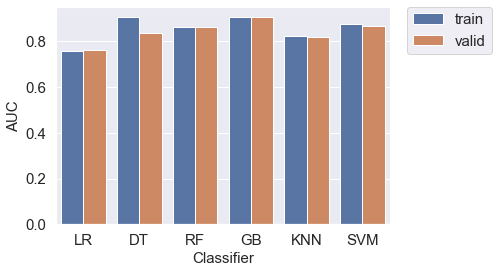

In [102]:
sns.set(style="darkgrid")
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.savefig('model_selection.png')
plt.show()

As we can see most of the models have similar performance on the validation set. Let’s see if we can improve this performance using a few more techniques.

# Model Selection: Learning Curve

In [109]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
   
    return plt

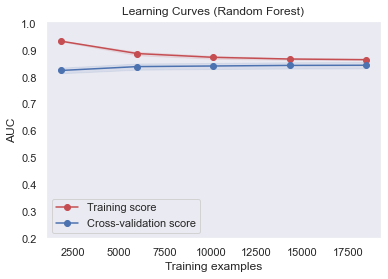

In [112]:
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 6, random_state = 42)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)
plt.savefig("learning_curve_rf.png")
plt.show()

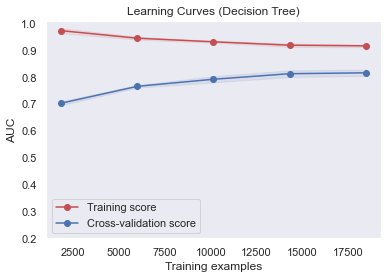

In [114]:
title = "Learning Curves (Decision Tree)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = DecisionTreeClassifier(max_depth = 10, random_state = 42)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)
plt.savefig("learning_curve_dt.png")
plt.show()

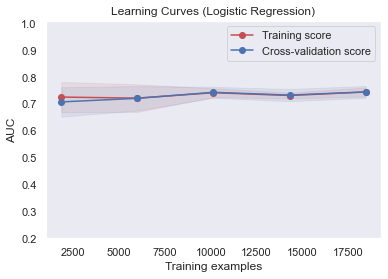

In [117]:
title = "Learning Curves (Logistic Regression)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = LogisticRegression(random_state = 42)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)
plt.savefig("learning_curve_lr.png")
plt.show()

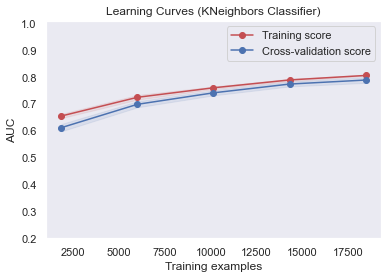

In [113]:
title = "Learning Curves (KNeighbors Classifier)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = KNeighborsClassifier(n_neighbors = 100)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)
plt.savefig("learning_curve_knn.png")
plt.show()

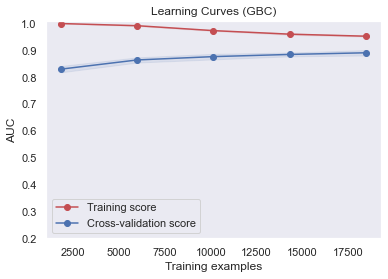

In [115]:
title = "Learning Curves (GBC)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)
plt.savefig("learning_curve_gbc.png")
plt.show()

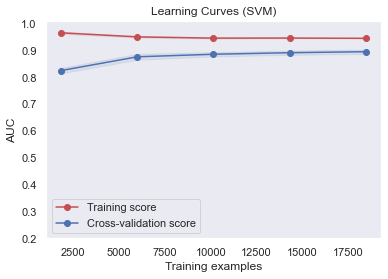

In [116]:
title = "Learning Curves (SVM)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = SVC(gamma='auto')
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)
plt.savefig("learning_curve_svm.png")
plt.show()

# Model Selection: Hyperparameter tuning

In this section, we will only optimize the hyper parameters for  random forest and gradient boosting classifier and KNN. We will not optimize SVM since it took a while to train. We will not optimize Logistic regression since it had poor performance. We will not optimize decision trees since they tend to overfit and perform worse than that random forests..

**Random forest Optimization**

In [180]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [181]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(1,10,1)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [182]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [183]:
# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

In [184]:
import time

In [185]:
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
165.76715564727783


#Analysing the performance of the best model compared to the baseline model

In [186]:
y_train_rf = rf.predict_proba(X_train)[:,1]
y_valid_rf = rf.predict_proba(X_val)[:,1]

print('Baseline Random Forest')
rf_train_auc_base = roc_auc_score(y_train, y_train_rf)
rf_valid_auc_base = roc_auc_score(y_val, y_valid_rf)

print('Training AUC:%.3f'%(rf_train_auc_base))
print('Validation AUC:%.3f'%(rf_valid_auc_base))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_val)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_auc = roc_auc_score(y_val, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_valid_auc))

Baseline Random Forest
Training AUC:0.862
Validation AUC:0.863
Optimized Random Forest
Training AUC:0.924
Validation AUC:0.899


In [187]:
y_test_pred_rf_opt = rf_random.best_estimator_.predict(X_test)
sub_file_rf_opt = pd.DataFrame().assign(CustomerID=submission_variable['CustomerID'])
sub_file_rf_opt['ReportedFraud'] = y_test_pred_rf_opt
sub_file_rf_opt.to_csv("Brunda_K_B109_rf_optimized.csv",index=False)

In [188]:
import pickle
  
# Save the trained model as a pickle string.
rf_model = pickle.dumps(rf_random.best_estimator_)
  
# Load the pickled model
rf_from_pickle = pickle.loads(rf_model)

In [ ]:
#################################################

**GBC Optimization**

In [189]:
#Optimize gradient boosting classifier
# number of trees
n_estimators = range(100,500,100)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc,
                                n_iter = 20, cv = 2, scoring=auc_scoring,
                                verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train, y_train)
t2 = time.time()
print(t2-t1)

268.8537435531616


In [190]:
gbc_random.best_params_

{'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}

In [191]:
y_train_preds = gbc.predict_proba(X_train)[:,1]
y_valid_preds = gbc.predict_proba(X_val)[:,1]

print('Baseline gbc')
gbc_train_auc_base = roc_auc_score(y_train, y_train_preds)
gbc_valid_auc_base = roc_auc_score(y_val, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_auc_base))
print('Validation AUC:%.3f'%(gbc_valid_auc_base))

print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_val)[:,1]
gbc_train_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_auc = roc_auc_score(y_val, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_auc))
print('Validation AUC:%.3f'%(gbc_valid_auc))

Baseline gbc
Training AUC:0.948
Validation AUC:0.906
Optimized gbc
Training AUC:0.937
Validation AUC:0.912


In [192]:
y_test_pred_gbc_opt = gbc_random.best_estimator_.predict(X_test)
sub_file_gbc_opt = pd.DataFrame().assign(CustomerID=submission_variable['CustomerID'])
sub_file_gbc_opt['ReportedFraud'] = y_test_pred_gbc_opt
sub_file_gbc_opt.to_csv("Brunda_K_B109_gbc_optimized.csv",index=False)

In [ ]:
##################################################

**KNN optimization**

In [118]:
from sklearn import metrics

In [119]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_val)
    mean_acc[i-1] = metrics.accuracy_score(y_val, yhat)

mean_acc

array([0.88973648, 0.9147018 , 0.93255895, 0.93169209, 0.93567961,
       0.93221221, 0.93359917, 0.93221221, 0.93099861, 0.92839806,
       0.92787795, 0.92631761, 0.92510402, 0.92059639, 0.92146325,
       0.91920943, 0.91782247, 0.91383495, 0.91366158, 0.91036755])

In [120]:
#Hyperparameter Tuning of KNN
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [198]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [199]:
g_res.best_score_

0.9355383534469021

In [200]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

In [201]:
knn_random = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'manhattan')
knn_random.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan')

In [202]:
# get a prediction
y_train_preds = knn.predict(X_train)
y_valid_preds = knn.predict(X_val)

print('Baseline KNN')
knn_train_auc_base = roc_auc_score(y_train, y_train_preds)
knn_valid_auc_base = roc_auc_score(y_val, y_valid_preds)

print('Training AUC:%.3f'%(knn_train_auc_base))
print('Validation AUC:%.3f'%(knn_valid_auc_base))

print('Optimized gbc')
y_train_preds_random = knn_random.predict(X_train)
y_valid_preds_random = knn_random.predict(X_val)
knn_train_auc = roc_auc_score(y_train, y_train_preds_random)
knn_valid_auc = roc_auc_score(y_val, y_valid_preds_random)

print('Training AUC:%.3f'%(knn_train_auc))
print('Validation AUC:%.3f'%(knn_valid_auc))

Baseline KNN
Training AUC:0.864
Validation AUC:0.862
Optimized gbc
Training AUC:0.909
Validation AUC:0.914


In [203]:
y_test_pred_knn_opt = knn_random.predict(X_test)
sub_file_knn_opt = pd.DataFrame().assign(CustomerID=submission_variable['CustomerID'])
sub_file_knn_opt['ReportedFraud'] = y_test_pred_knn_opt
sub_file_knn_opt.to_csv("Brunda_K_B109_knn_optimized.csv",index=False)

In [204]:
import pickle
  
# Save the trained model as a pickle string.
knn_model = pickle.dumps(knn_random)
  
# Load the pickled model
knn_from_pickle = pickle.loads(knn_model)
  

In [ ]:
######################################################

# Hyper parameter tuning Results

In [205]:
df_results = pd.DataFrame({'classifier':['RF','RF','GB','GB','KNN','KNN'],
                           'data_set':['base','optimized']*3,
                          'auc':[rf_valid_auc_base,rf_valid_auc,
                                 gbc_valid_auc_base,gbc_valid_auc,
                                knn_valid_auc_base,knn_valid_auc,],
                          })

In [206]:
df_results

classifier   data_set       auc
0         RF       base  0.862840
1         RF  optimized  0.899101
2         GB       base  0.905982
3         GB  optimized  0.912173
4        KNN       base  0.862306
5        KNN  optimized  0.913812

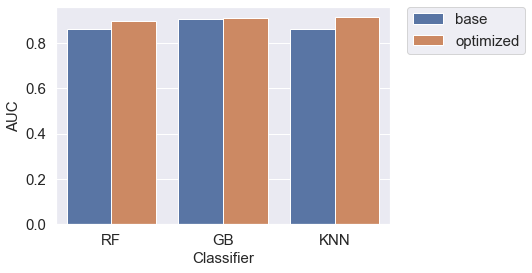

In [207]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

**NOTE : we can choose KNN Classifier Since it has best AUC.**

# Model Evaluation

In [208]:
y_train_preds = knn_from_pickle.predict(X_train)
y_valid_preds = knn_from_pickle.predict(X_val)
y_test_preds = knn_from_pickle.predict(X_test)


In [209]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_val,y_valid_preds, thresh)

Training:
AUC:0.909
accuracy:0.942
recall:0.837
precision:0.940
specificity:0.980
 
Validation:
AUC:0.914
accuracy:0.944
recall:0.847
precision:0.942
specificity:0.980
 


In [210]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_valid_preds_random)

array([[4102,   82],
       [ 242, 1342]], dtype=int64)

In [211]:
confusion_matrix(y_train, y_train_preds_random)

array([[16537,   330],
       [ 1010,  5191]], dtype=int64)

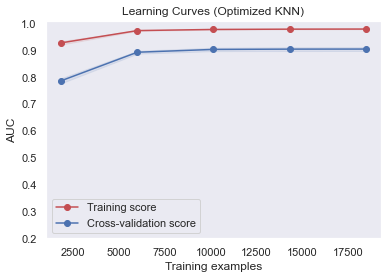

In [123]:
title = "Learning Curves (Optimized KNN)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'manhattan')
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)
plt.savefig("learning_curve_knn_opt.png")
plt.show()

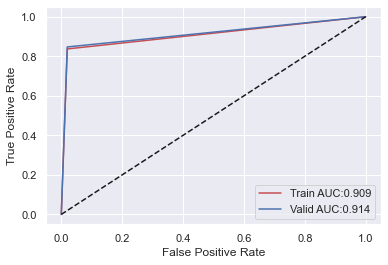

In [212]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_val, y_valid_preds)
auc_valid = roc_auc_score(y_val, y_valid_preds)


plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig("ROC_AUC.png")
plt.show()

# Conclusion

Through this project, I created a binary classifier to predict the probability that a Auto Insurance claim is Fraud or Not. On held out validation data, our best model had an AUC of of 0.914 

**Problem faced during approaching problem :-**

Due to the absence of domain expert, had to take too much decision by ourself which might or might not be true.

Due to the lack of knowledge  it became very difficult to treat the some columns.